# **Project Name : ✨ Wine Quality Analysis ✨**

AUTHOR : **Jamshed Butt** from **Data Science**

# Import Libraries

In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

#Columns Relationship for target value
from sklearn.feature_selection import mutual_info_classif

#Splitting Data
from sklearn.model_selection import train_test_split,cross_val_score

#Normalize Data
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import PCA

#Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc
from sklearn import metrics

# **Load Dataset**

In [295]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Win Quality/WineQT.csv")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [296]:
df.shape

(1143, 13)

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [298]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [299]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

# **Univariate Analysis**

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


<ipython-input-301-235b4baf6e27>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["fixed acidity"], kde=True, color="orange", bins=10)


<Axes: xlabel='fixed acidity', ylabel='Density'>

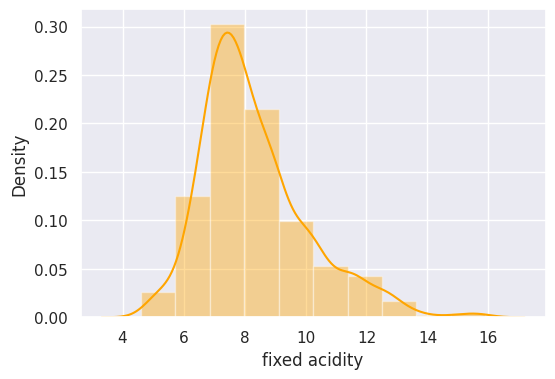

In [301]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["fixed acidity"], kde=True, color="orange", bins=10)

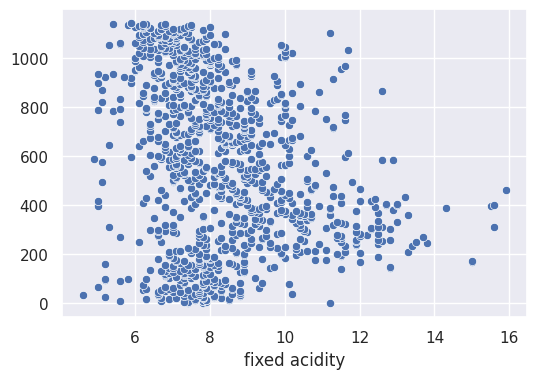

In [302]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="fixed acidity",y=df.index,data=df)
plt.show()

<ipython-input-303-df78ba8401fc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["volatile acidity"], kde=True, color="orange", bins=10)


<Axes: xlabel='volatile acidity', ylabel='Density'>

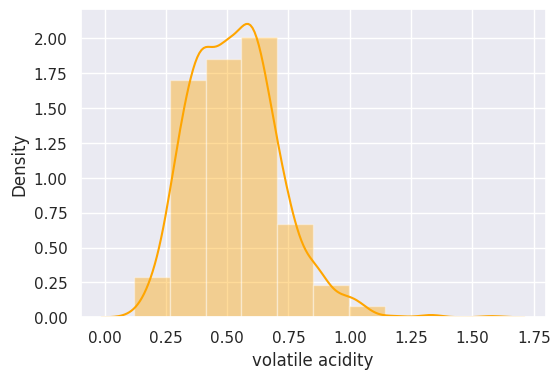

In [303]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["volatile acidity"], kde=True, color="orange", bins=10)

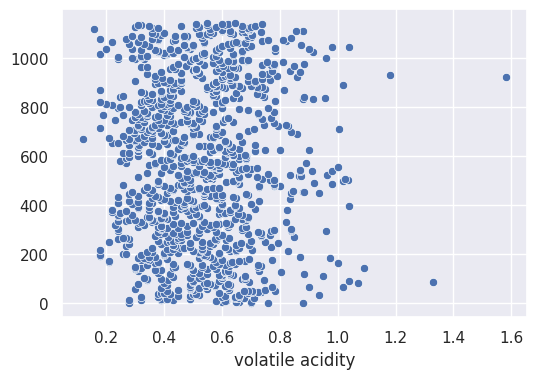

In [304]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="volatile acidity",y=df.index,data=df)
plt.show()

<ipython-input-305-57e6aea974ea>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["citric acid"], kde=True, color="orange", bins=10)


<Axes: xlabel='citric acid', ylabel='Density'>

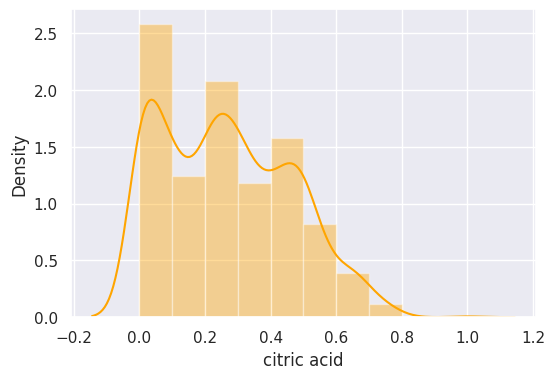

In [305]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["citric acid"], kde=True, color="orange", bins=10)

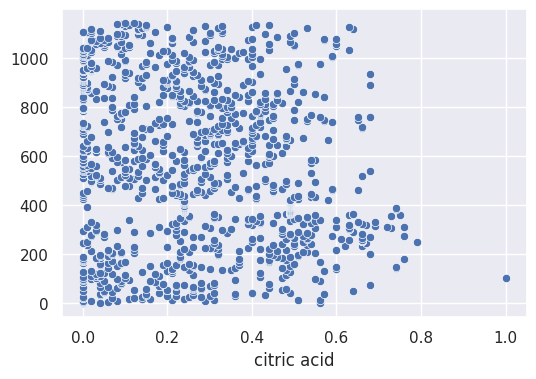

In [306]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="citric acid",y=df.index,data=df)
plt.show()

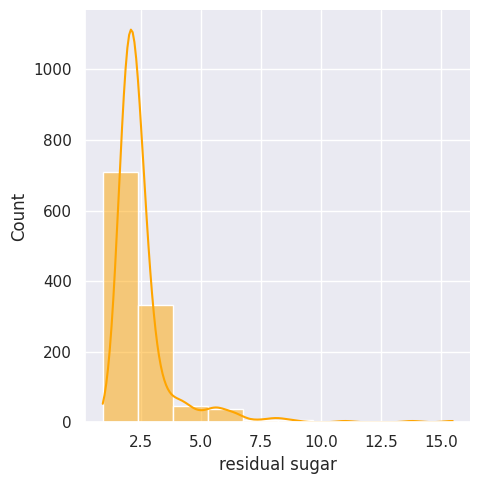

In [307]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["residual sugar"],kde="True",color="orange",bins=10)

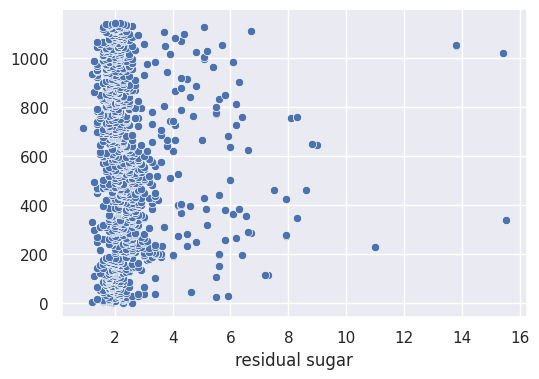

In [308]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="residual sugar",y=df.index,data=df)
plt.show()

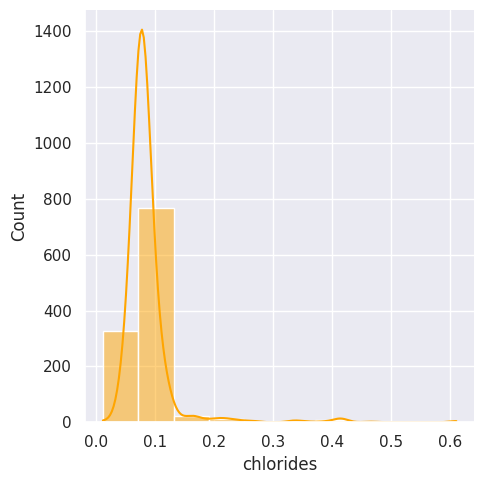

In [309]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["chlorides"],kde="True",color="orange",bins=10)

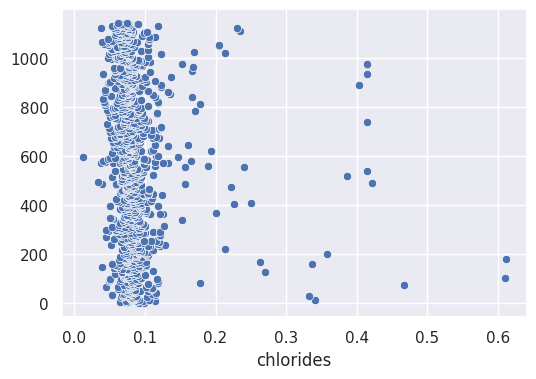

In [310]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="chlorides",y=df.index,data=df)
plt.show()

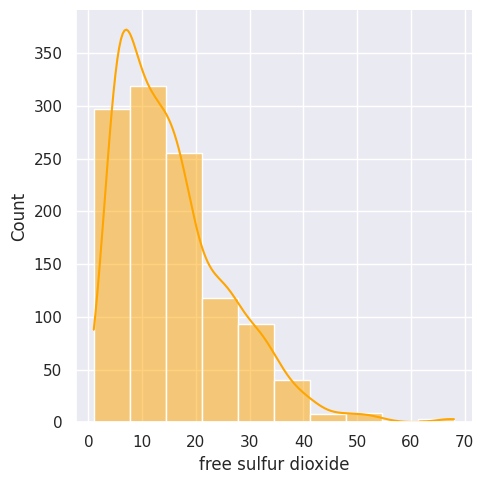

In [311]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["free sulfur dioxide"],kde="True",color="orange",bins=10)

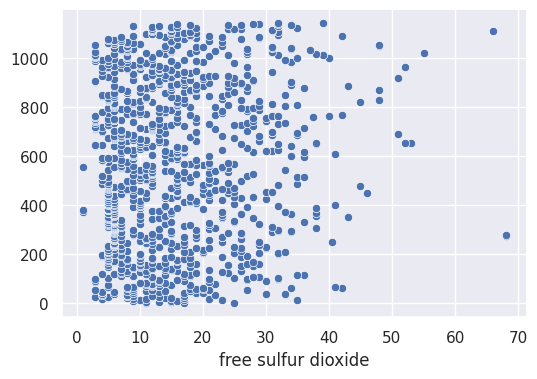

In [312]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="free sulfur dioxide",y=df.index,data=df)
plt.show()

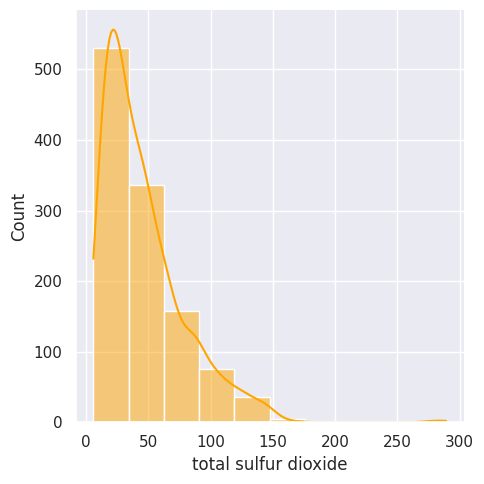

In [313]:
sns.set(rc={"figure.figsize":(6,4)})
sns.displot(df["total sulfur dioxide"],kde="True",color="orange",bins=10)

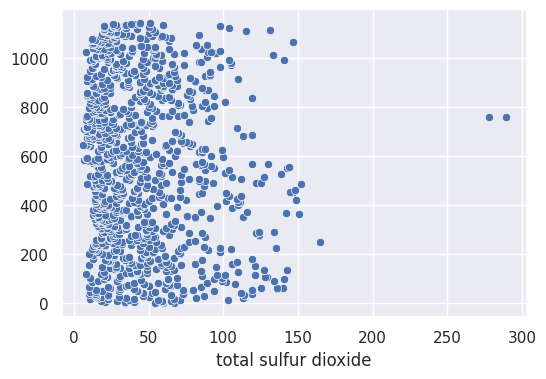

In [314]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="total sulfur dioxide",y=df.index,data=df)
plt.show()

<ipython-input-315-73e0ea00e34f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["density"], kde=True, color="orange", bins=10)


<Axes: xlabel='density', ylabel='Density'>

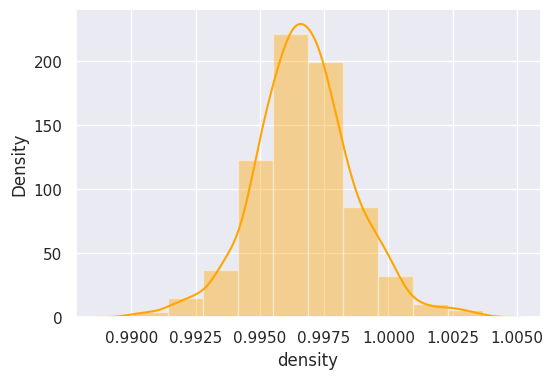

In [315]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["density"], kde=True, color="orange", bins=10)

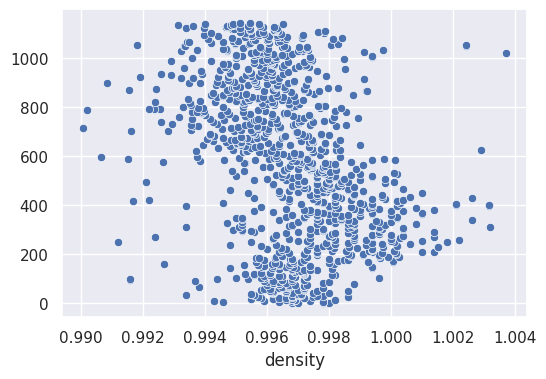

In [316]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="density",y=df.index,data=df)
plt.show()

<ipython-input-317-c71c2ebfda1c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["pH"], kde=True, color="orange", bins=10)


<Axes: xlabel='pH', ylabel='Density'>

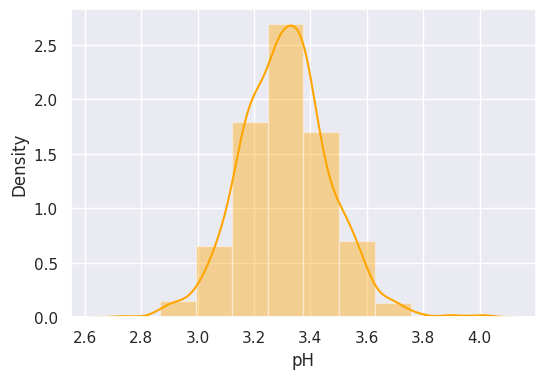

In [317]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["pH"], kde=True, color="orange", bins=10)

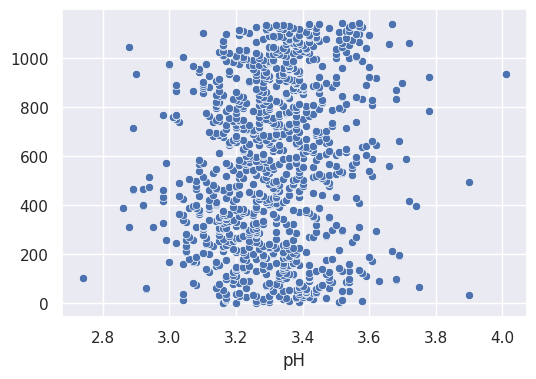

In [318]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="pH",y=df.index,data=df)
plt.show()

<ipython-input-319-1b45ff53b3bb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["sulphates"], kde=True, color="orange", bins=10)


<Axes: xlabel='sulphates', ylabel='Density'>

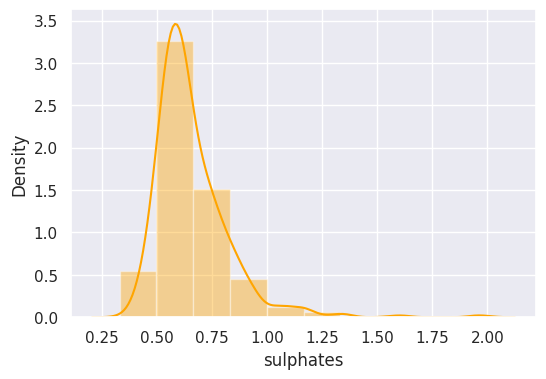

In [319]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["sulphates"], kde=True, color="orange", bins=10)

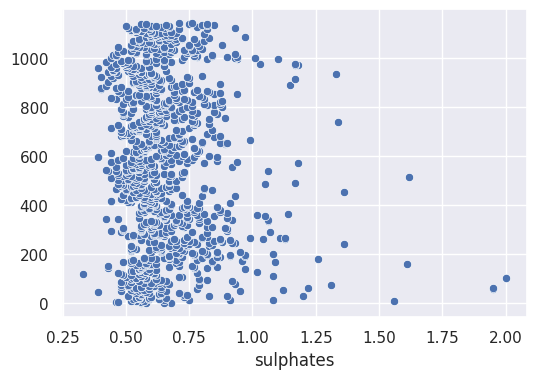

In [320]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="sulphates",y=df.index,data=df)
plt.show()

<ipython-input-321-16ad9ece9de0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["alcohol"], kde=True, color="orange", bins=10)


<Axes: xlabel='alcohol', ylabel='Density'>

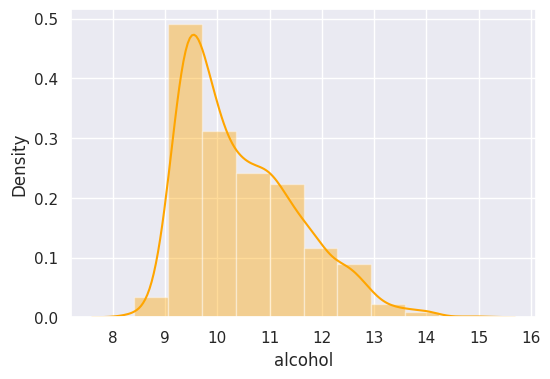

In [321]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["alcohol"], kde=True, color="orange", bins=10)

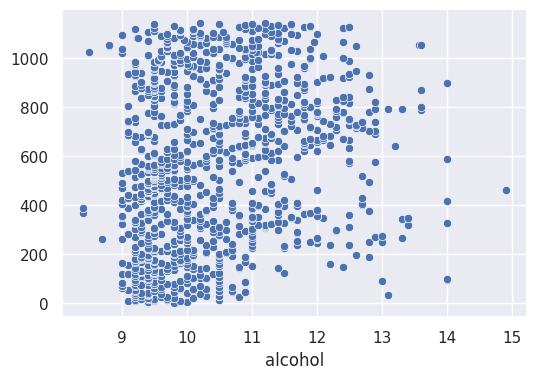

In [322]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="alcohol",y=df.index,data=df)
plt.show()

<ipython-input-323-47b84480bdd0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["quality"], kde=True, color="orange", bins=10)


<Axes: xlabel='quality', ylabel='Density'>

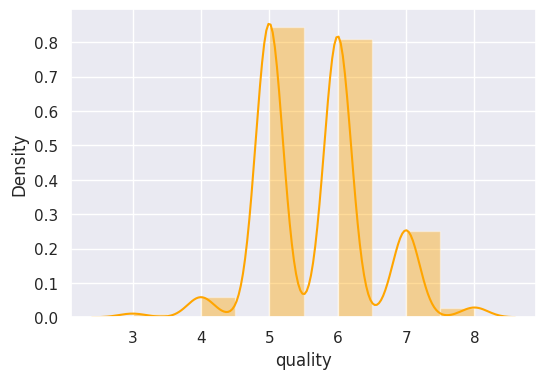

In [323]:
sns.set(rc={"figure.figsize":(6,4)})
sns.distplot(df["quality"], kde=True, color="orange", bins=10)

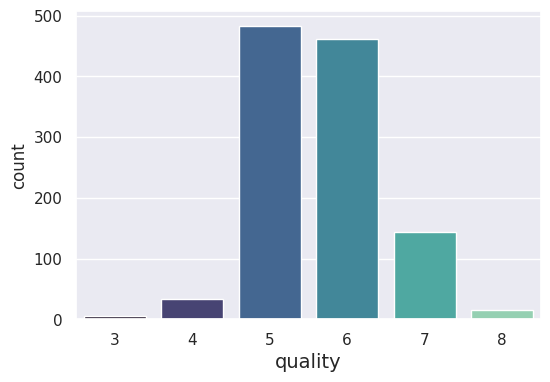

In [324]:
plt.figure(figsize=(6,4))
sns.countplot(x='quality' , data=df ,palette='mako')
plt.xlabel('quality', fontsize=14)
plt.show()

# **EDA (Exploratory Data Analysis)**

#### **Remove Duplicate**

In [325]:
duplicate = df.duplicated()
print(duplicate.sum())

0


#### **Check and Remove NaN Values**

In [326]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

#### **Remove Outliers**

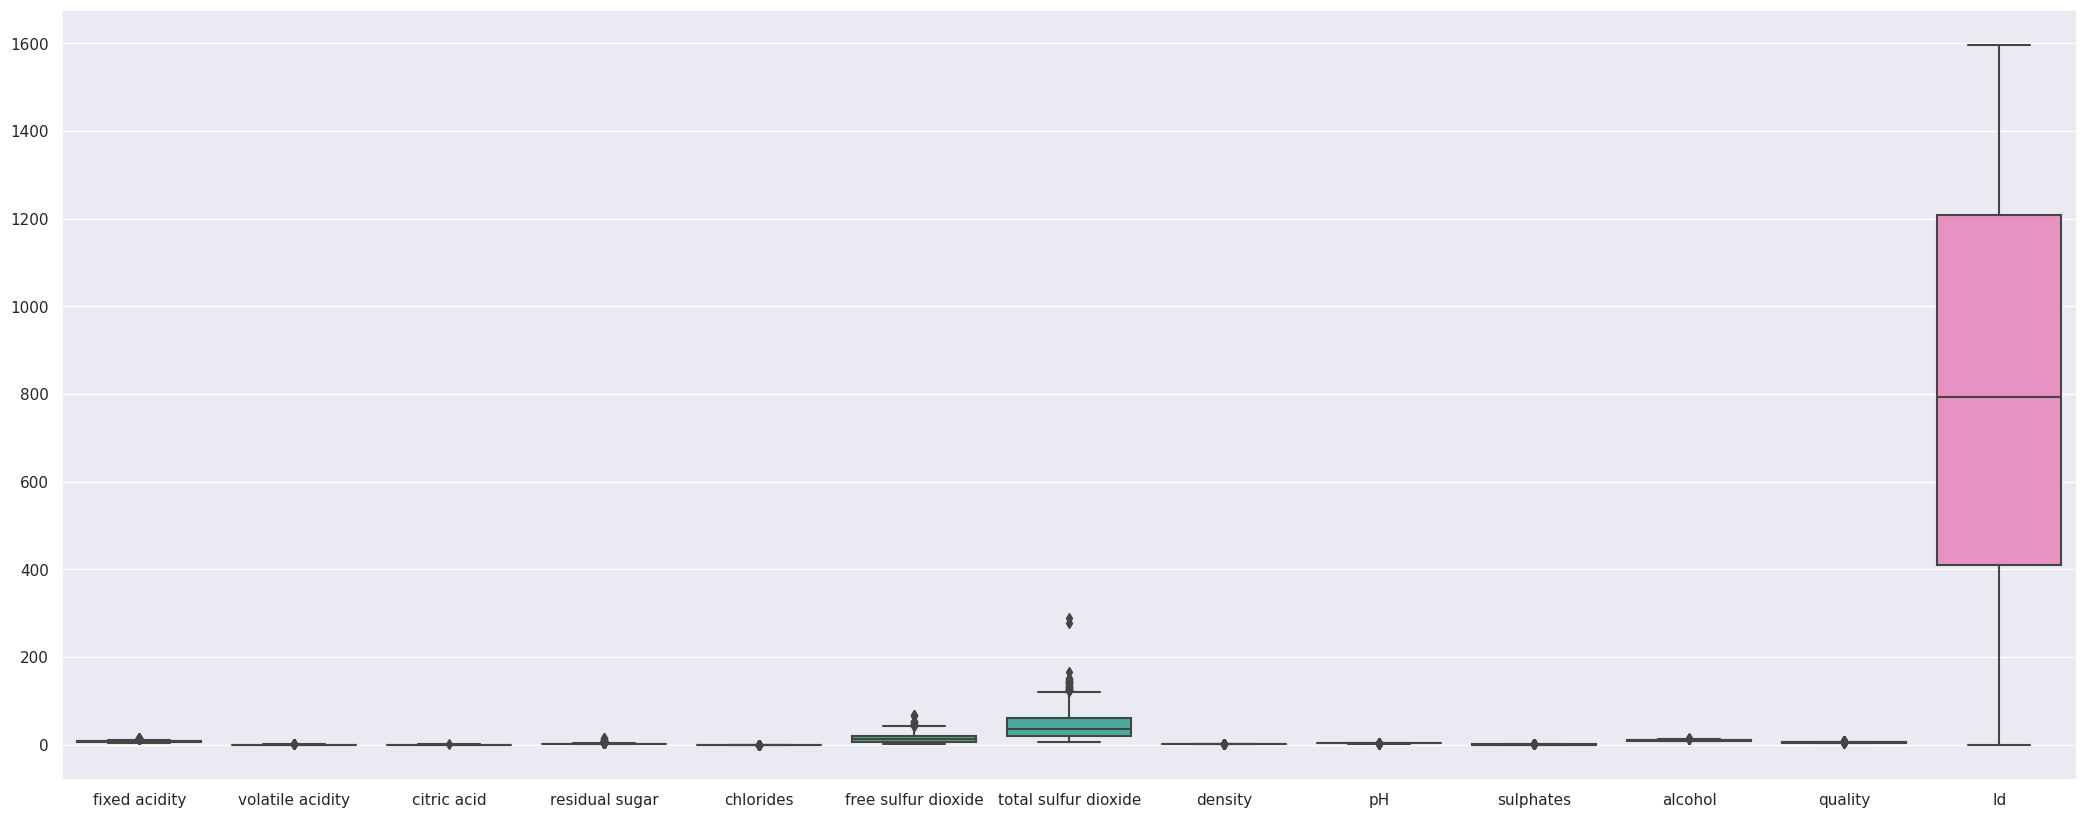

In [327]:
plt.figure(figsize=(26,10))
sns.boxplot(df)
plt.show()

In [328]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [329]:
for i in df.columns:
    lower_range,upper_range = remove_outlier(df[i])
    df[i] = np.where(df[i] > upper_range, upper_range, df[i])
    df[i] = np.where(df[i] < lower_range, lower_range, df[i])

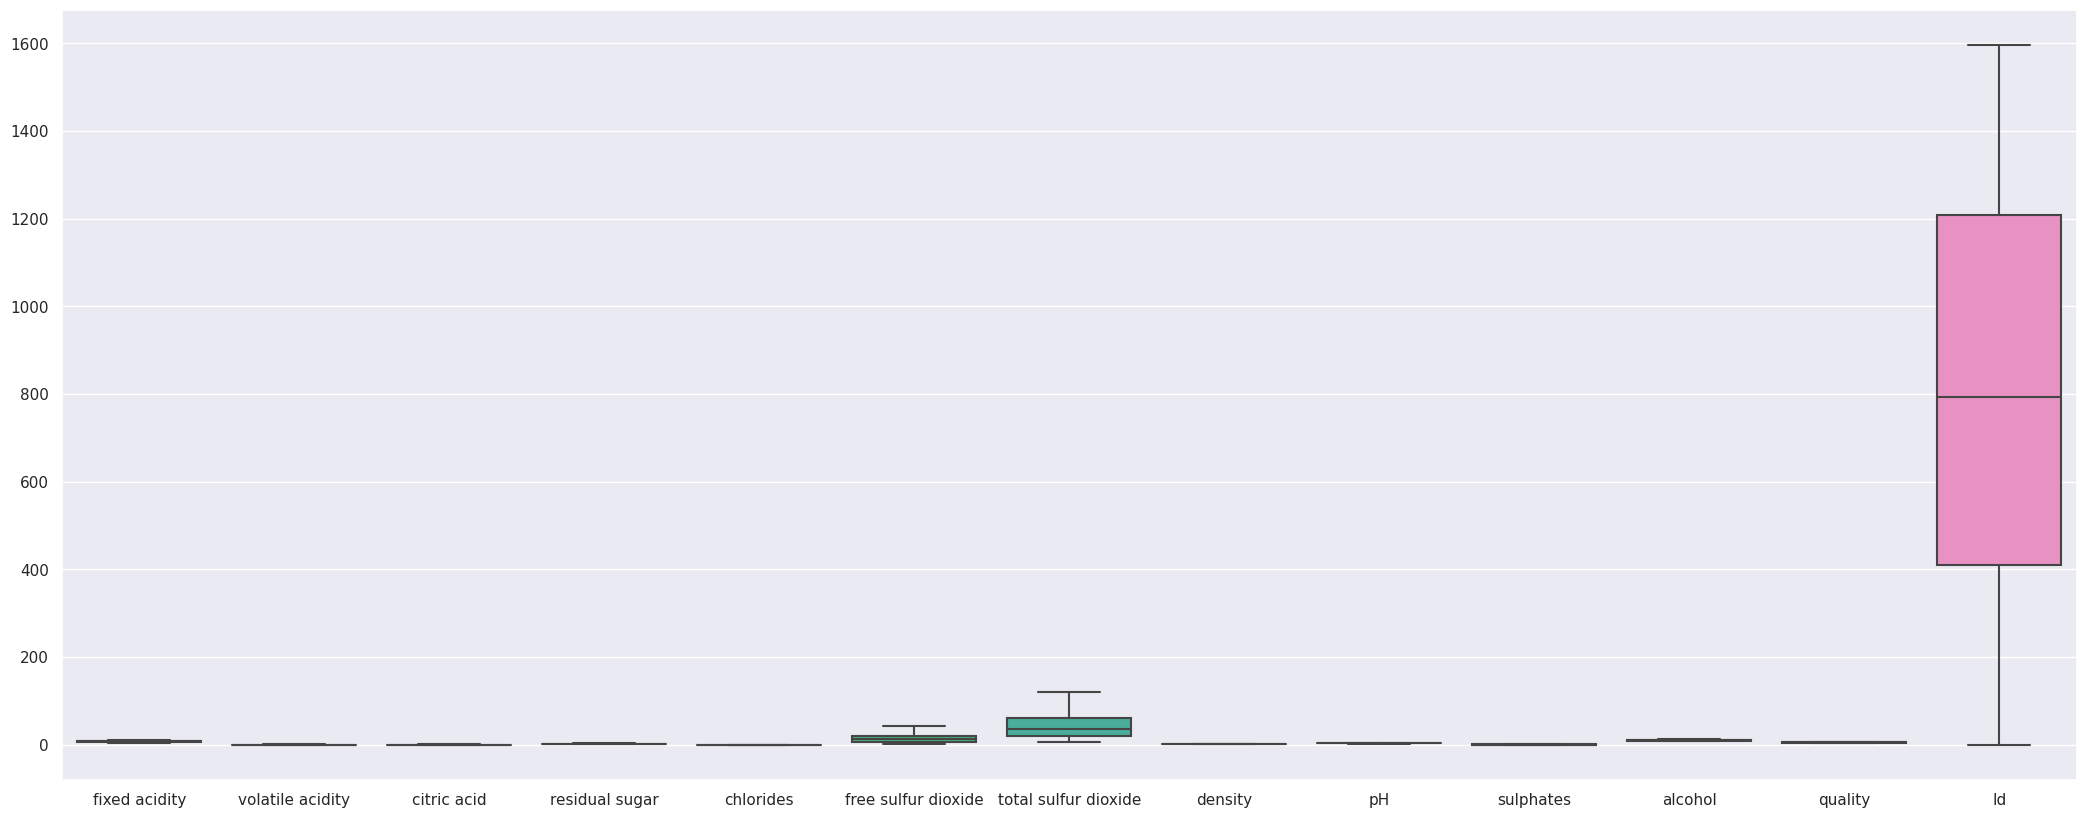

In [330]:
plt.figure(figsize=(26,10))
sns.boxplot(df)
plt.show()

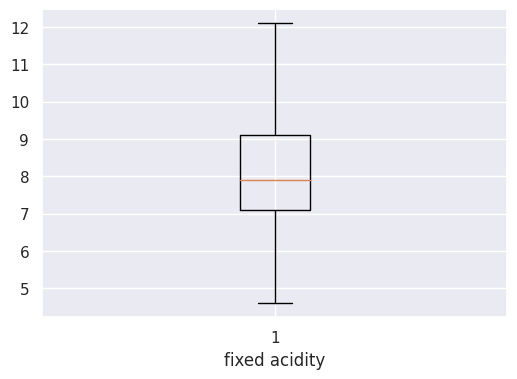

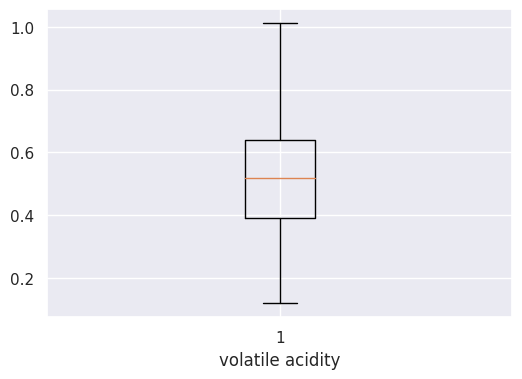

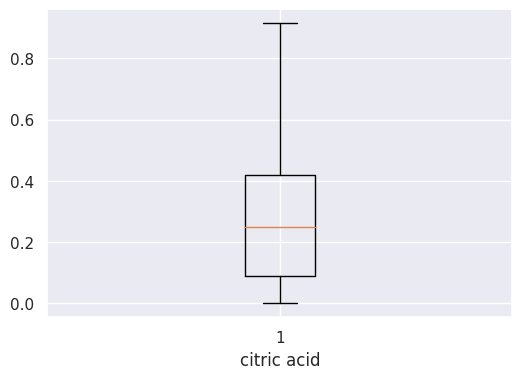

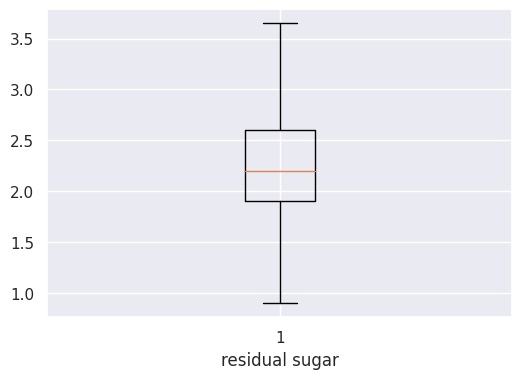

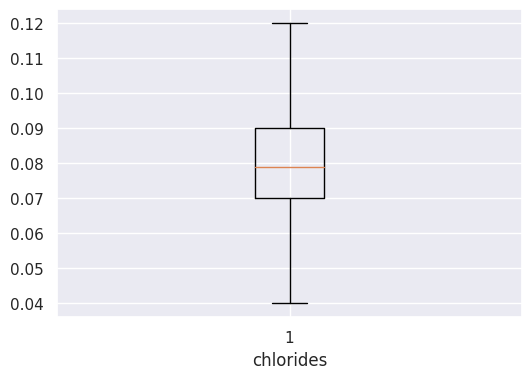

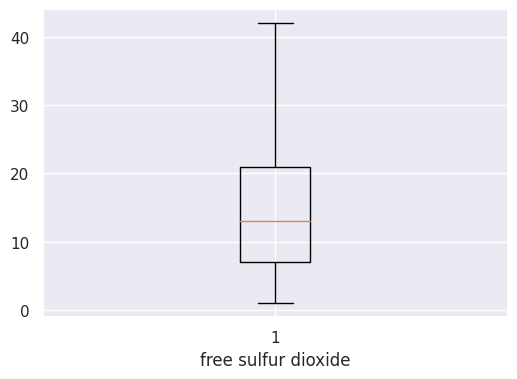

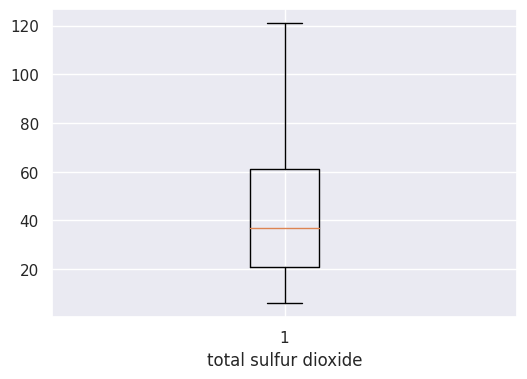

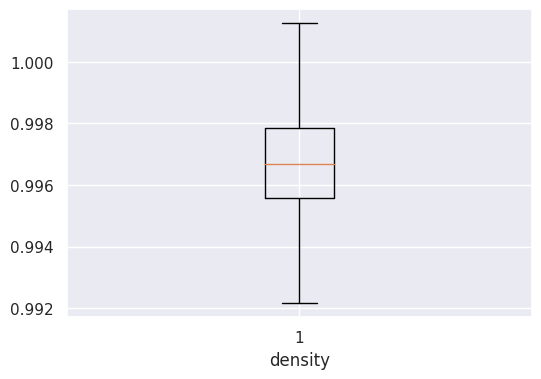

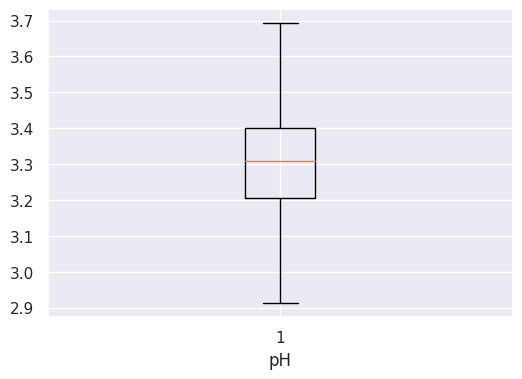

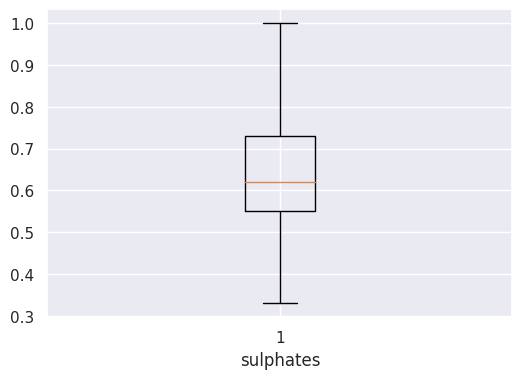

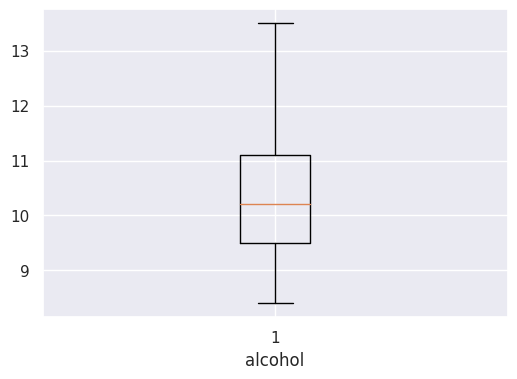

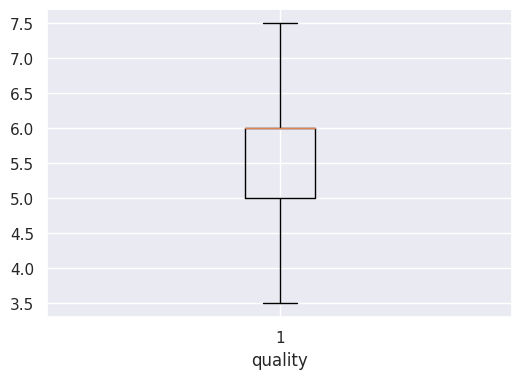

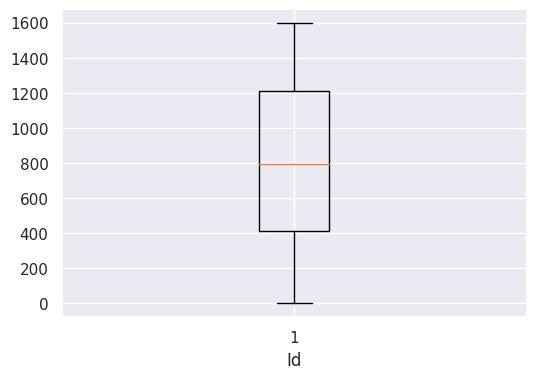

In [331]:
for i in df.columns:
  plt.boxplot(df[i])
  plt.xlabel(i)
  plt.show()

#### **Bivaraite Analysis**

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   float64
 12  Id                    1143 non-null   float64
dtypes: float64(13)
memory usage: 116.2 KB


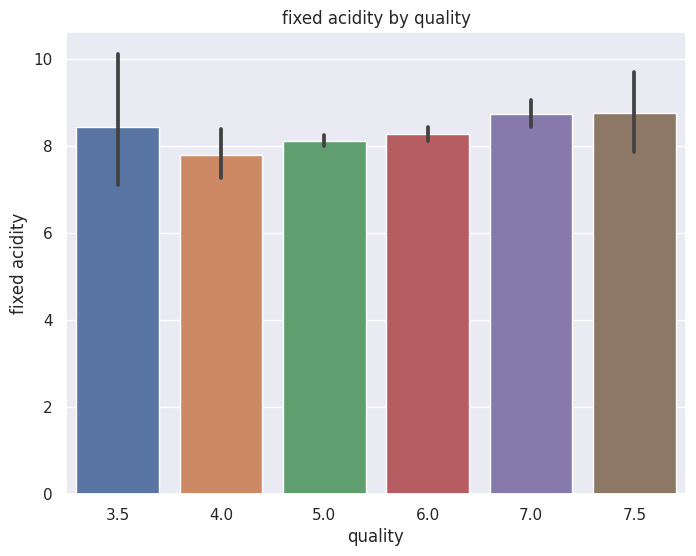

In [333]:
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='fixed acidity', data=df)
plt.title('fixed acidity by quality')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.show()

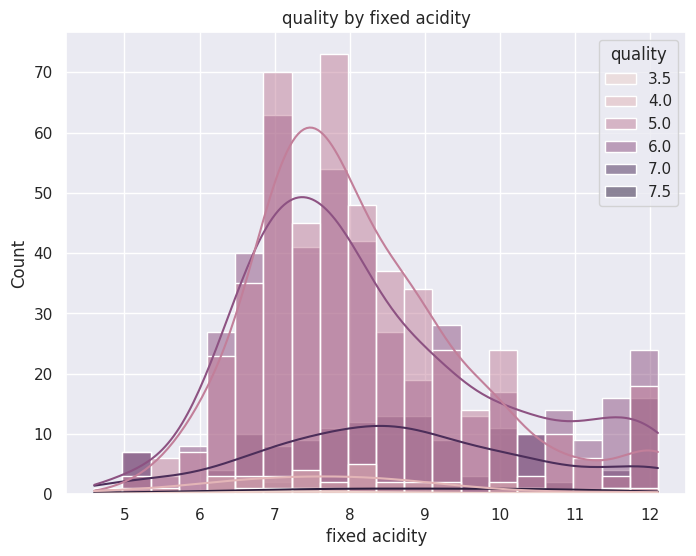

In [334]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='fixed acidity', hue='quality', kde=True, bins=20)
plt.title('quality by fixed acidity')
plt.xlabel('fixed acidity')
plt.ylabel('Count')
plt.show()

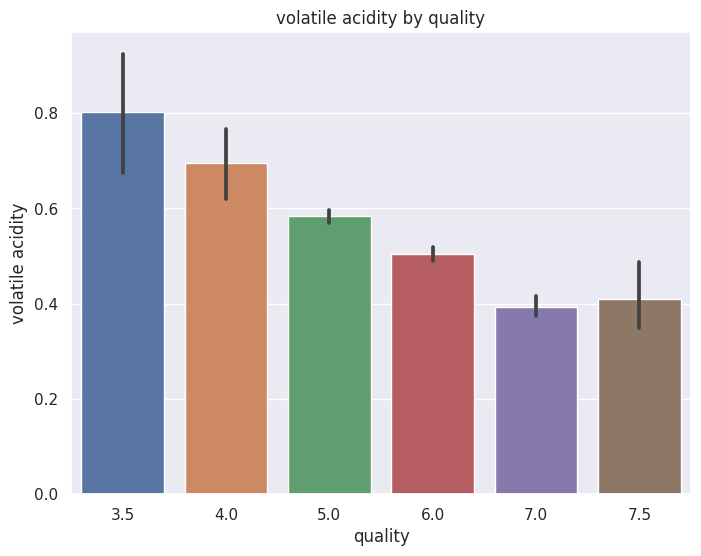

In [335]:
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='volatile acidity', data=df)
plt.title('volatile acidity by quality')
plt.xlabel('quality')
plt.ylabel('volatile acidity')
plt.show()

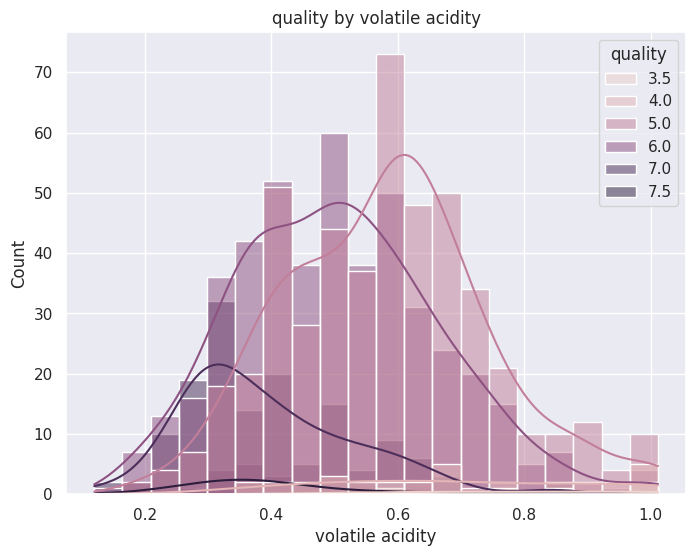

In [336]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='volatile acidity', hue='quality', kde=True, bins=20)
plt.title('quality by volatile acidity')
plt.xlabel('volatile acidity')
plt.ylabel('Count')
plt.show()

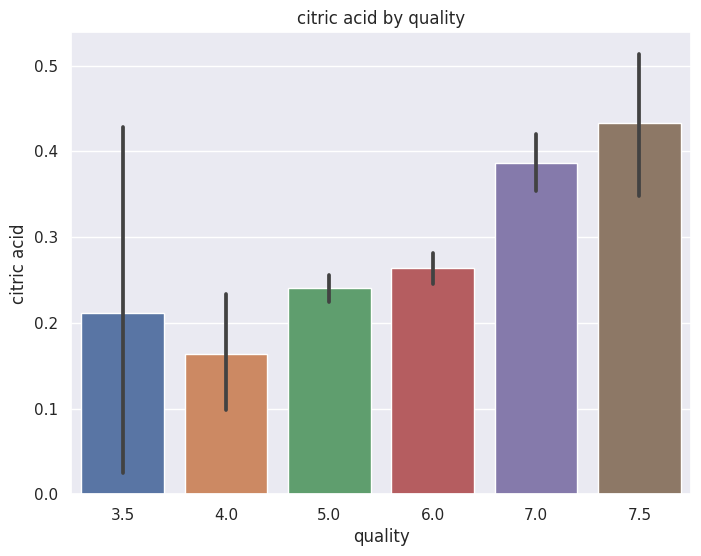

In [337]:
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='citric acid', data=df)
plt.title('citric acid by quality')
plt.xlabel('quality')
plt.ylabel('citric acid')
plt.show()

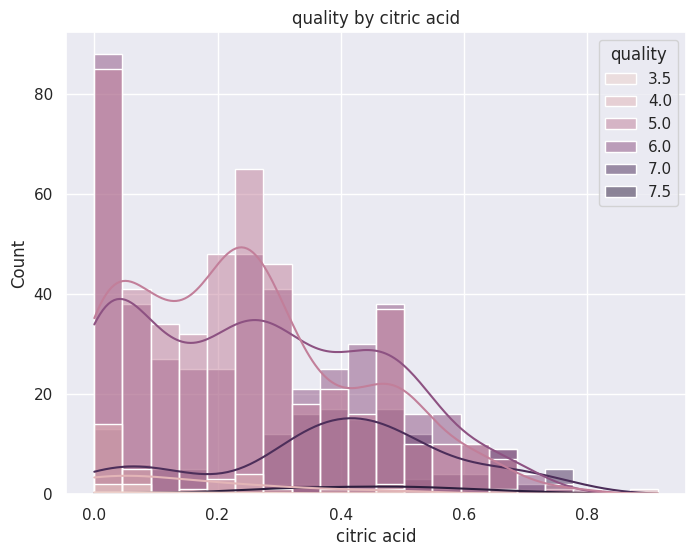

In [338]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='citric acid', hue='quality', kde=True, bins=20)
plt.title('quality by citric acid')
plt.xlabel('citric acid')
plt.ylabel('Count')
plt.show()

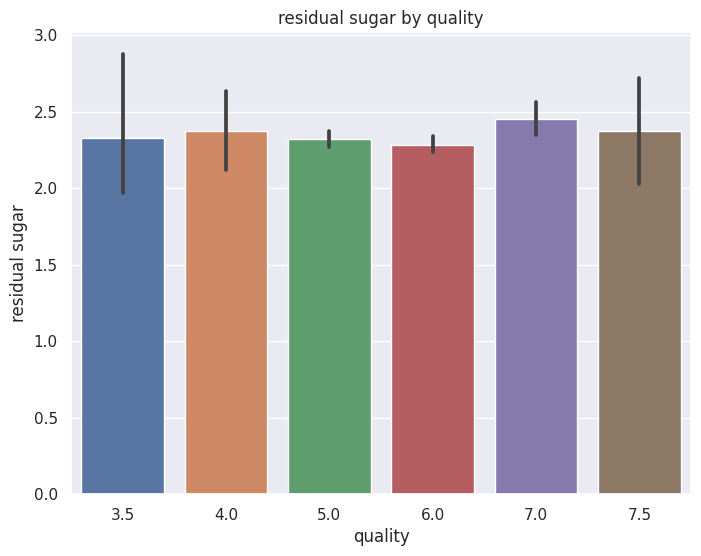

In [339]:
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='residual sugar', data=df)
plt.title('residual sugar by quality')
plt.xlabel('quality')
plt.ylabel('residual sugar')
plt.show()

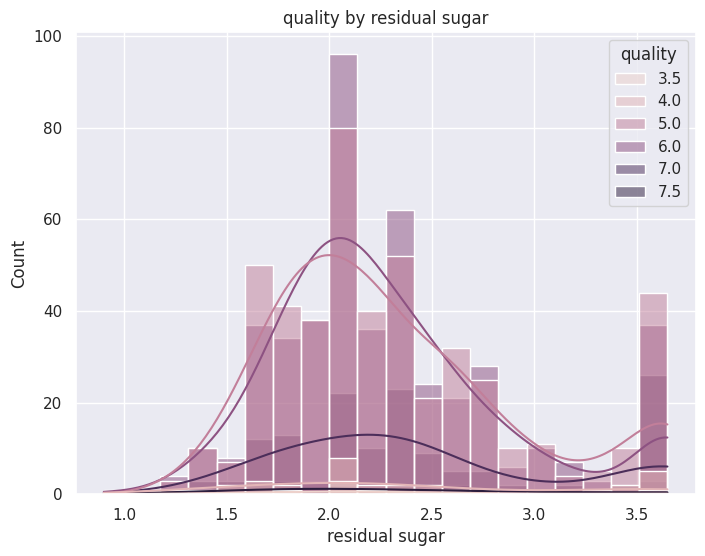

In [340]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='residual sugar', hue='quality', kde=True, bins=20)
plt.title('quality by residual sugar')
plt.xlabel('residual sugar')
plt.ylabel('Count')
plt.show()

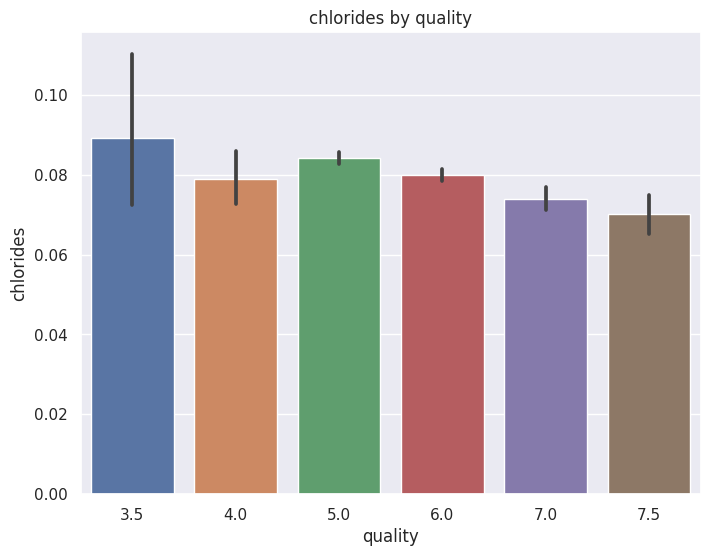

In [341]:
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='chlorides', data=df)
plt.title('chlorides by quality')
plt.xlabel('quality')
plt.ylabel('chlorides')
plt.show()

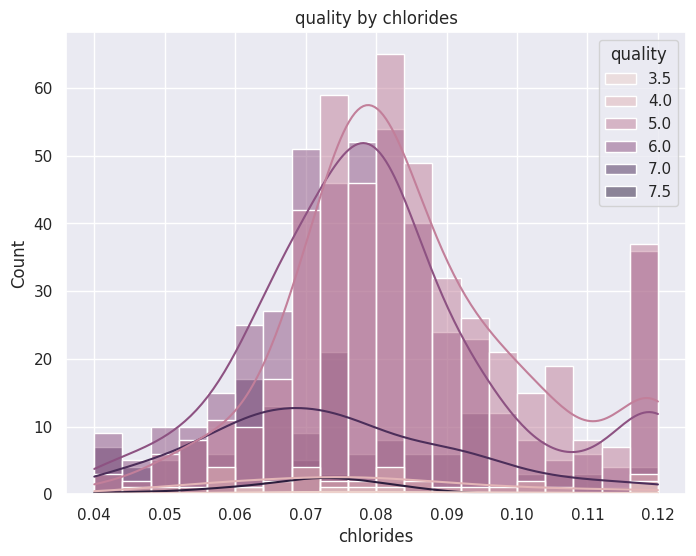

In [342]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='chlorides', hue='quality', kde=True, bins=20)
plt.title('quality by chlorides')
plt.xlabel('chlorides')
plt.ylabel('Count')
plt.show()

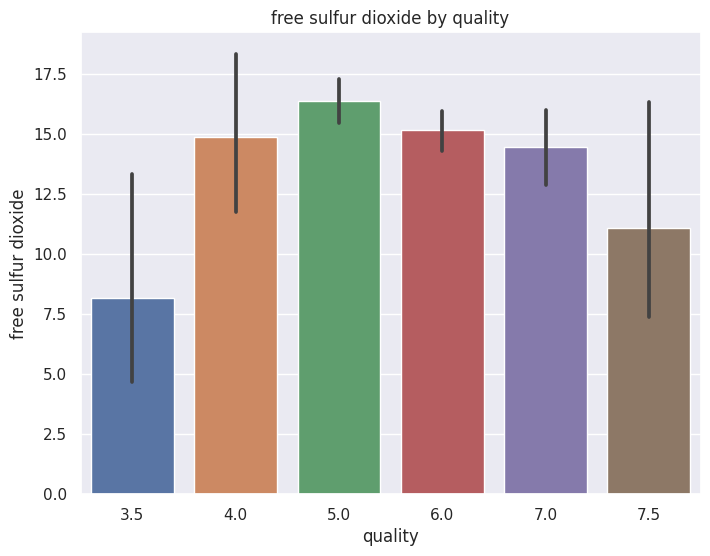

In [343]:
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='free sulfur dioxide', data=df)
plt.title('free sulfur dioxide by quality')
plt.xlabel('quality')
plt.ylabel('free sulfur dioxide')
plt.show()

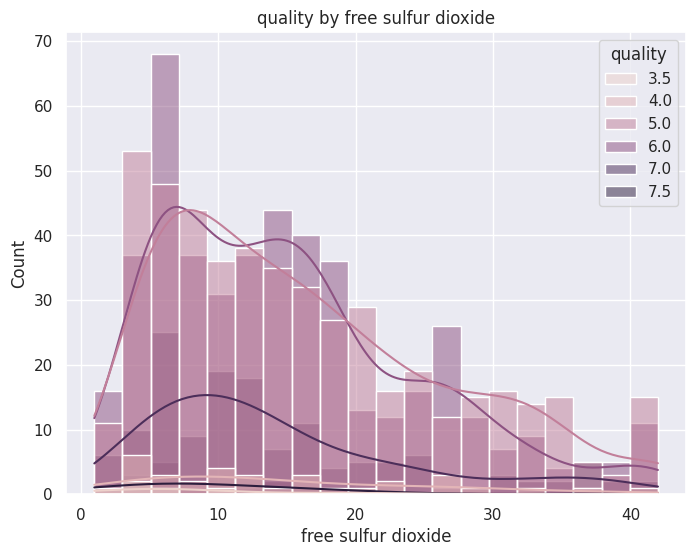

In [344]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='free sulfur dioxide', hue='quality', kde=True, bins=20)
plt.title('quality by free sulfur dioxide')
plt.xlabel('free sulfur dioxide')
plt.ylabel('Count')
plt.show()

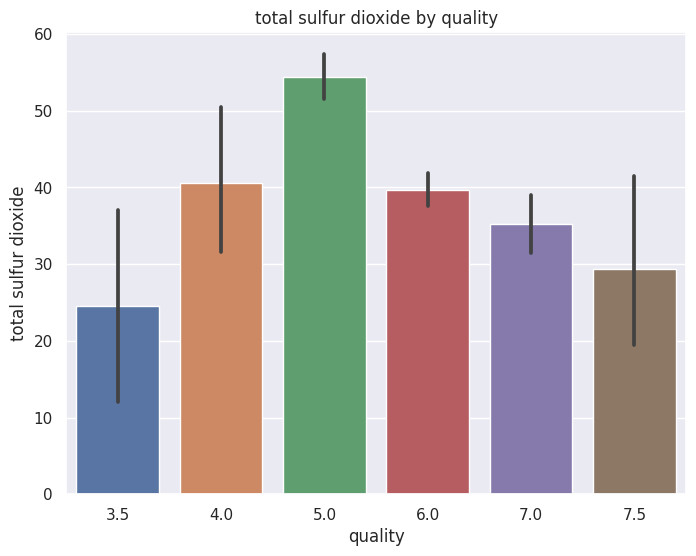

In [345]:
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='total sulfur dioxide', data=df)
plt.title('total sulfur dioxide by quality')
plt.xlabel('quality')
plt.ylabel('total sulfur dioxide')
plt.show()

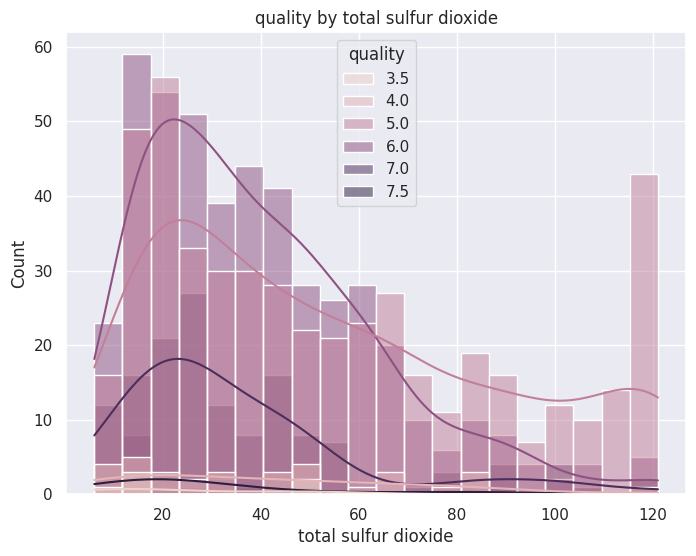

In [346]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='total sulfur dioxide', hue='quality', kde=True, bins=20)
plt.title('quality by total sulfur dioxide')
plt.xlabel('total sulfur dioxide')
plt.ylabel('Count')
plt.show()

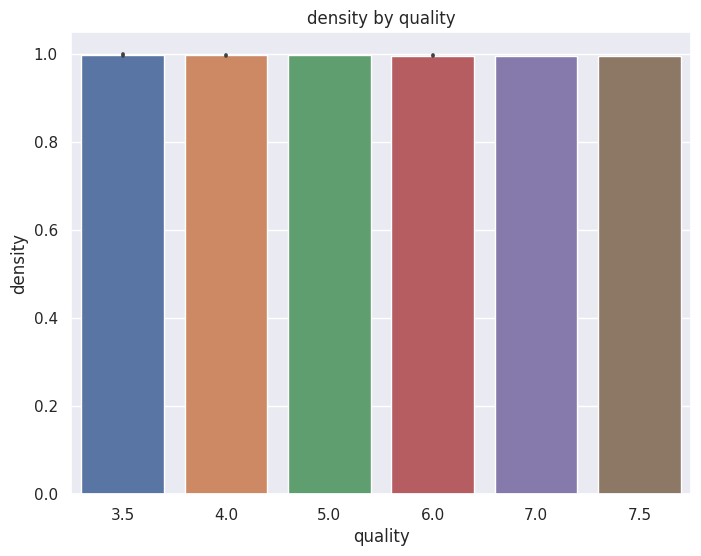

In [347]:
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='density', data=df)
plt.title('density by quality')
plt.xlabel('quality')
plt.ylabel('density')
plt.show()

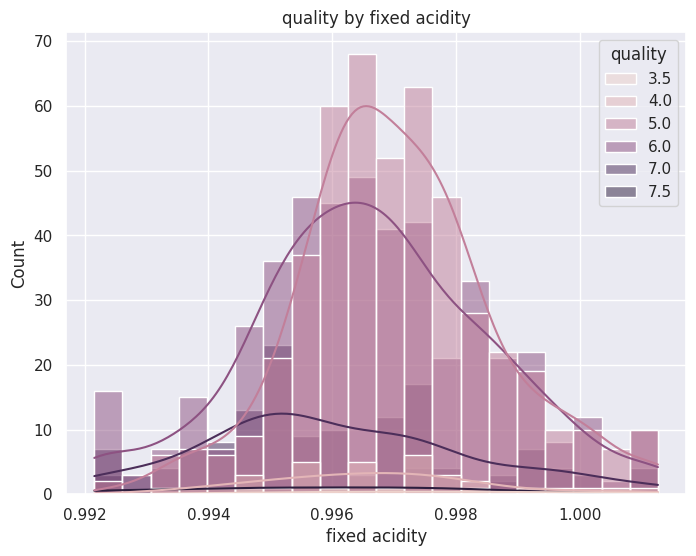

In [348]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='density', hue='quality', kde=True, bins=20)
plt.title('quality by fixed acidity')
plt.xlabel('fixed acidity')
plt.ylabel('Count')
plt.show()

In [349]:
df["density"].value_counts()

0.99760    27
0.99720    25
0.99940    22
0.99680    22
0.99640    21
           ..
0.99471     1
0.99252     1
0.99256     1
0.99235     1
0.99651     1
Name: density, Length: 366, dtype: int64

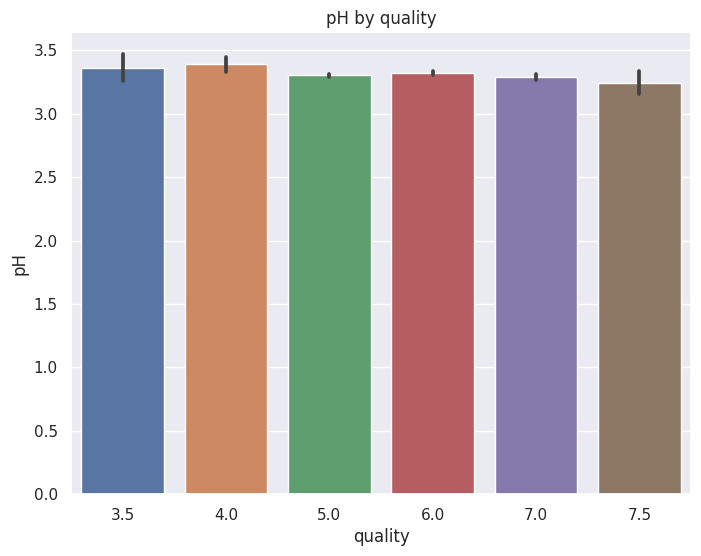

In [350]:
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='pH', data=df)
plt.title('pH by quality')
plt.xlabel('quality')
plt.ylabel('pH')
plt.show()

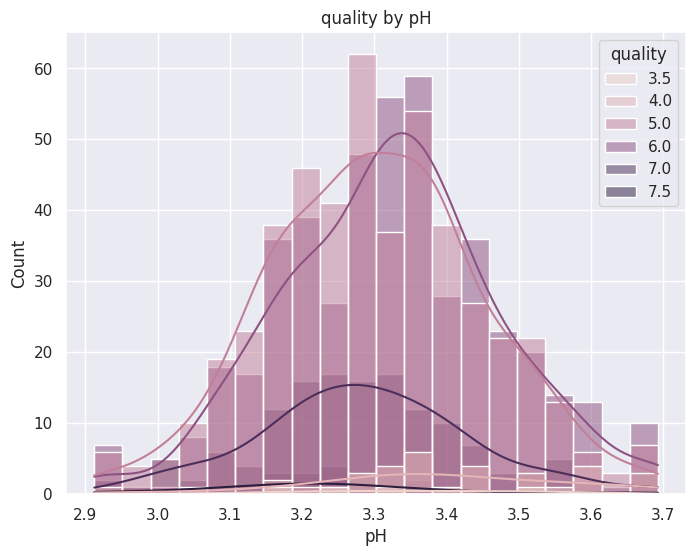

In [351]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='pH', hue='quality', kde=True, bins=20)
plt.title('quality by pH')
plt.xlabel('pH')
plt.ylabel('Count')
plt.show()

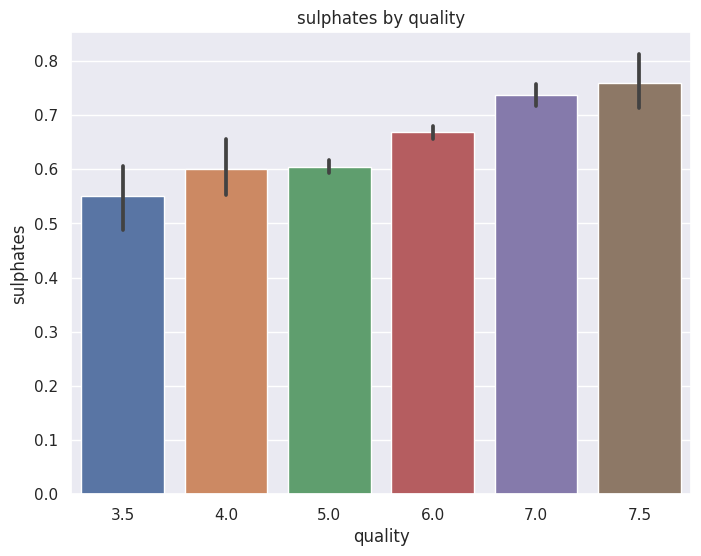

In [352]:
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='sulphates', data=df)
plt.title('sulphates by quality')
plt.xlabel('quality')
plt.ylabel('sulphates')
plt.show()

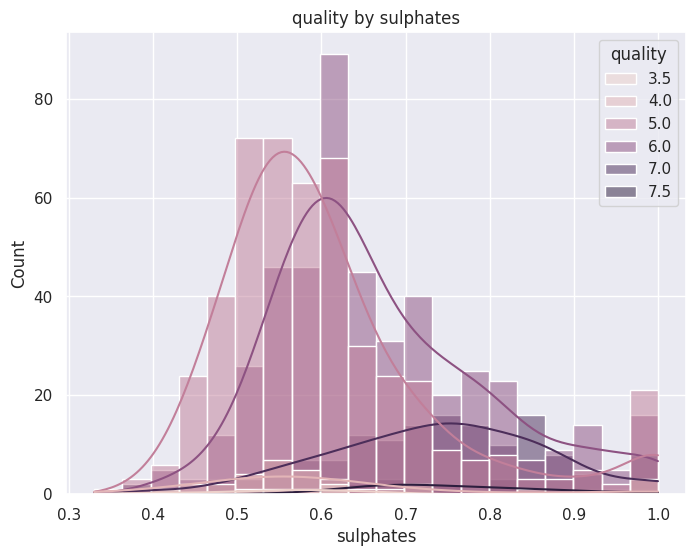

In [353]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='sulphates', hue='quality', kde=True, bins=20)
plt.title('quality by sulphates')
plt.xlabel('sulphates')
plt.ylabel('Count')
plt.show()

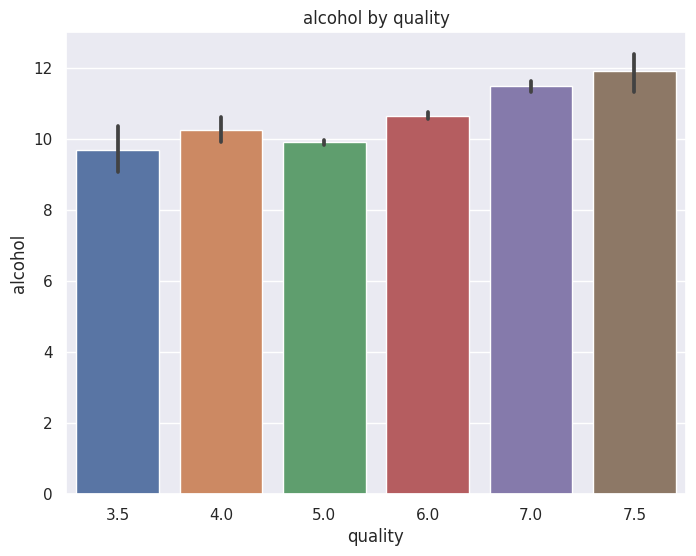

In [354]:
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='alcohol', data=df)
plt.title('alcohol by quality')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

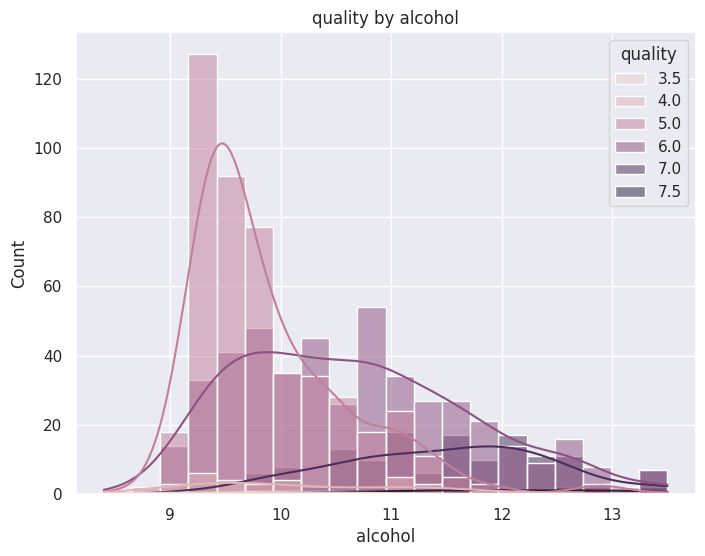

In [355]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='alcohol', hue='quality', kde=True, bins=20)
plt.title('quality by alcohol')
plt.xlabel('alcohol')
plt.ylabel('Count')
plt.show()

<ipython-input-356-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


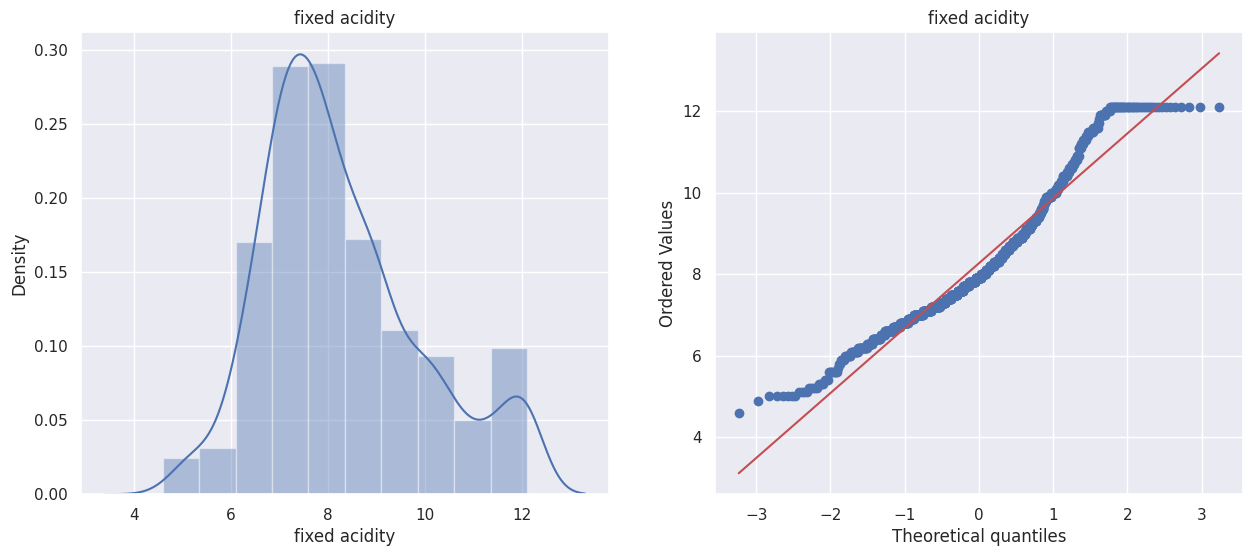

<ipython-input-356-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


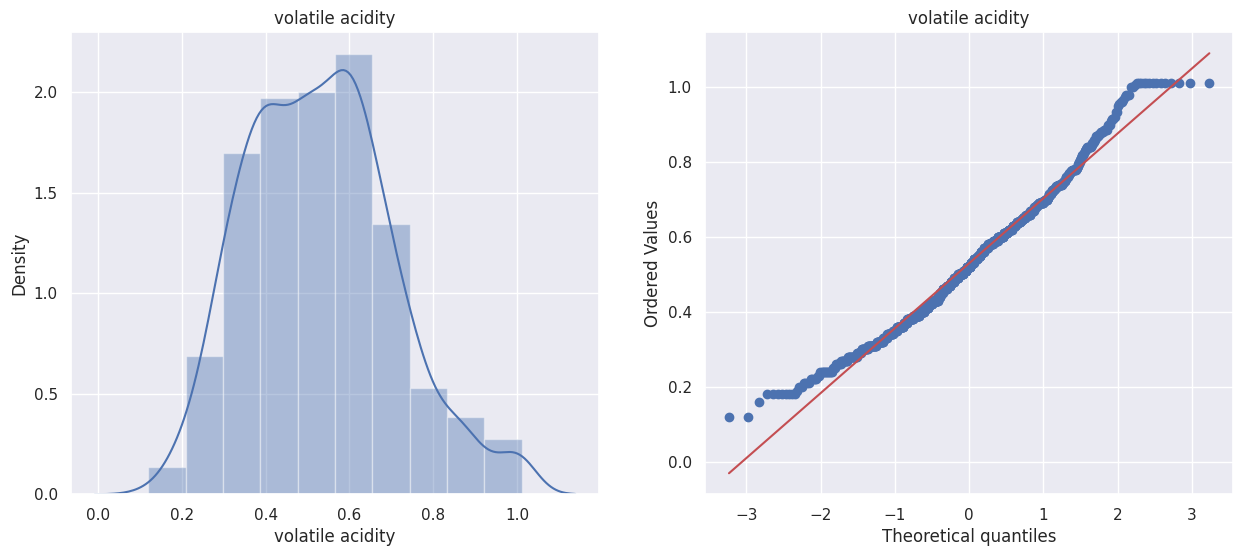

<ipython-input-356-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


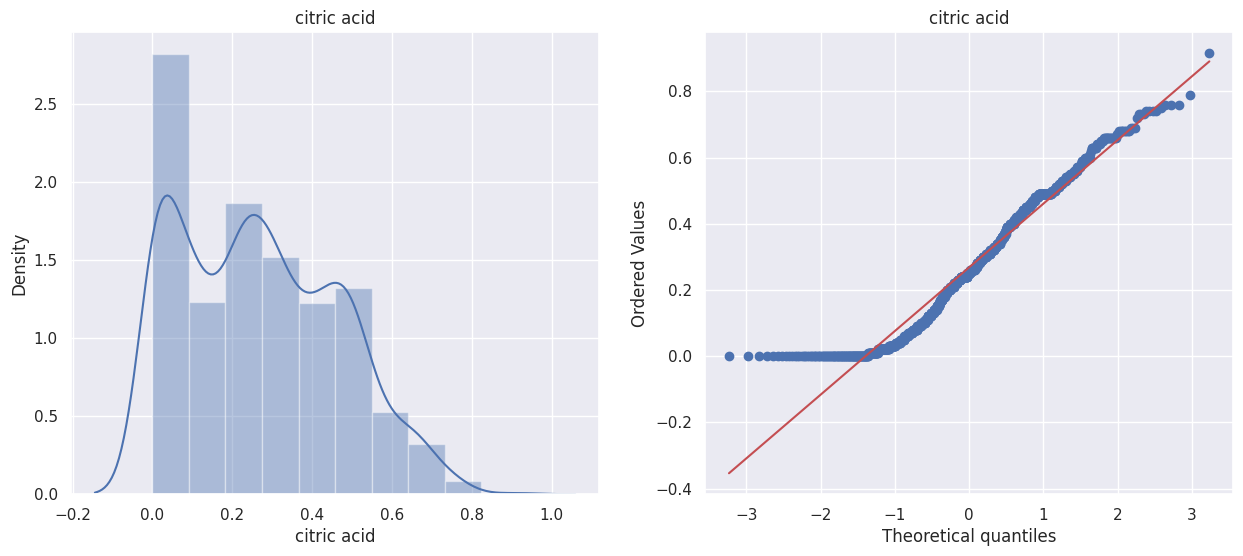

<ipython-input-356-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


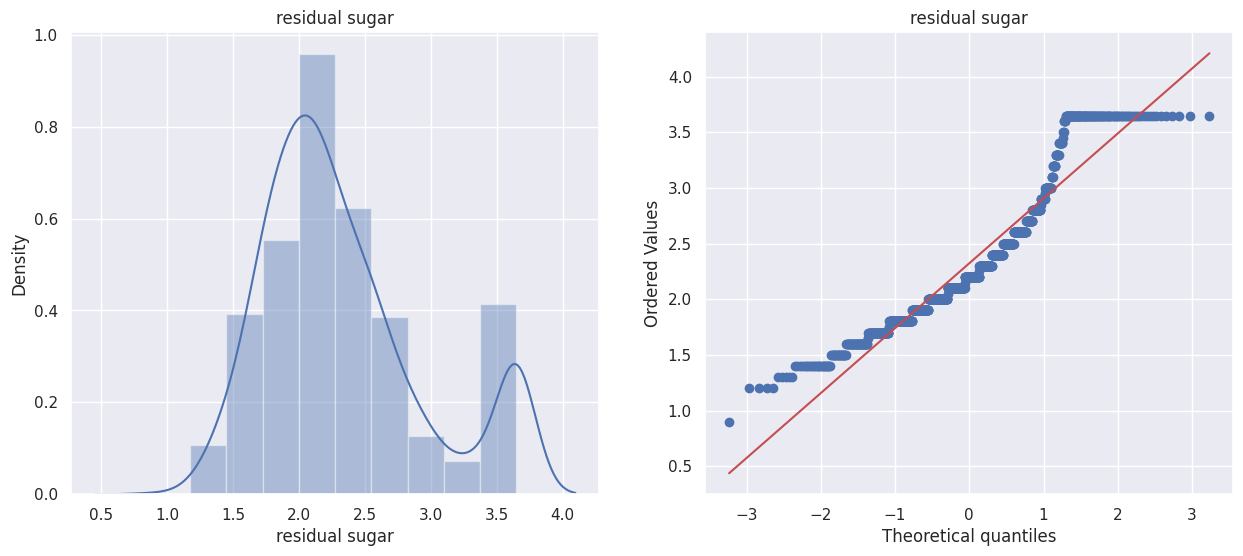

<ipython-input-356-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


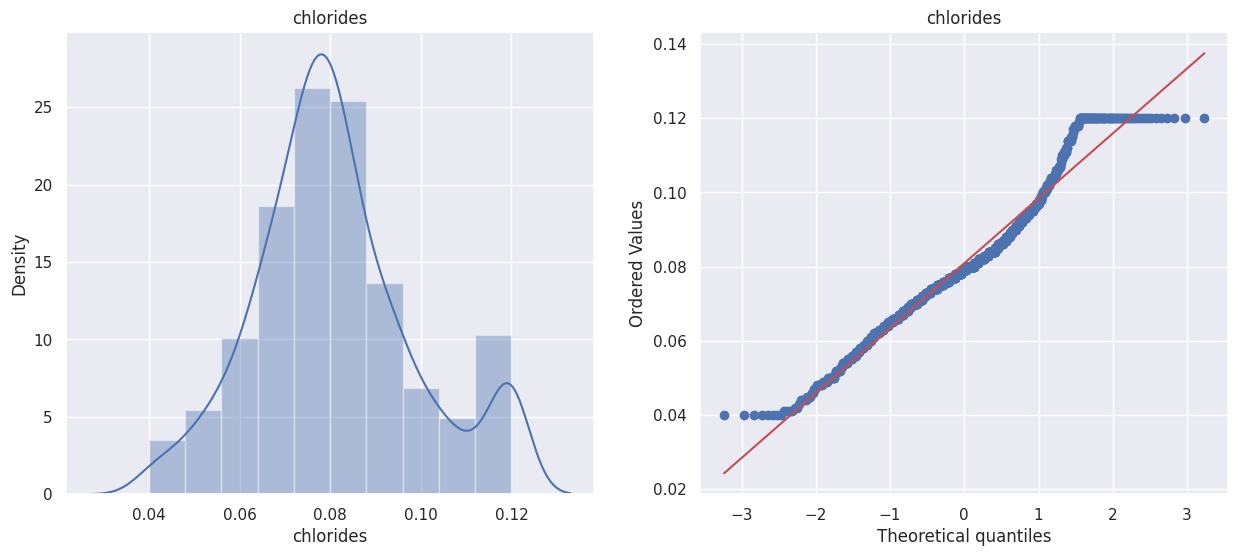

<ipython-input-356-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


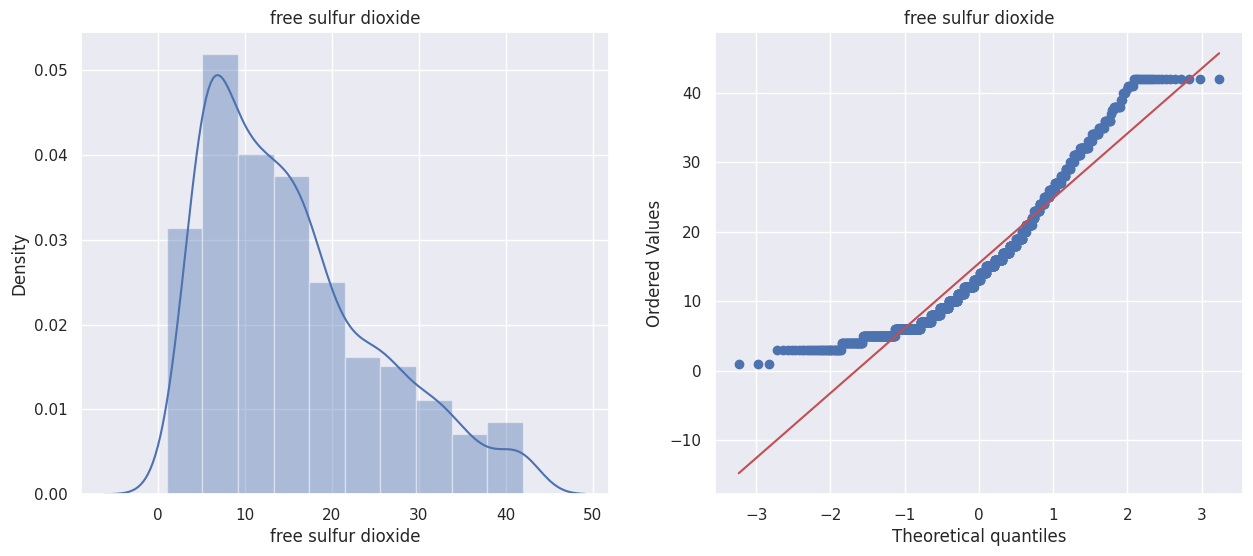

<ipython-input-356-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


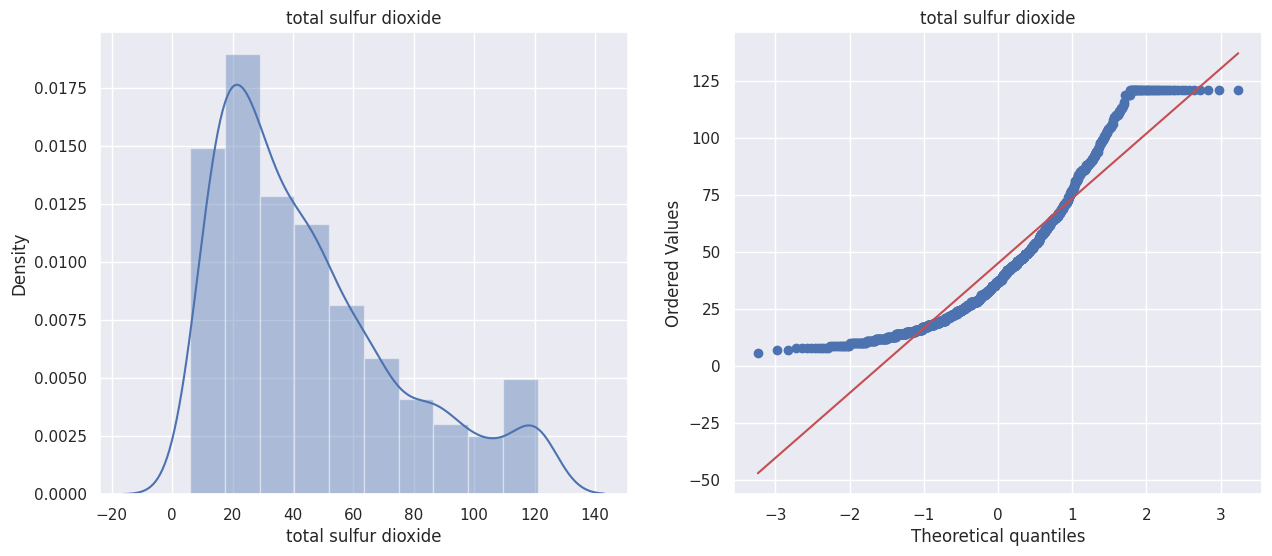

<ipython-input-356-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


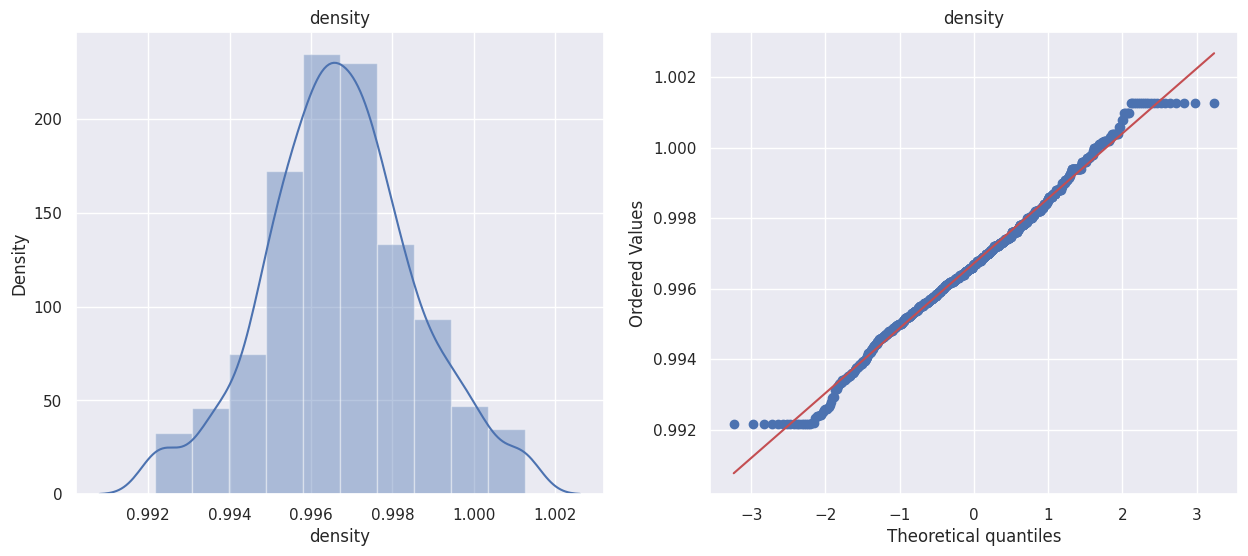

<ipython-input-356-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


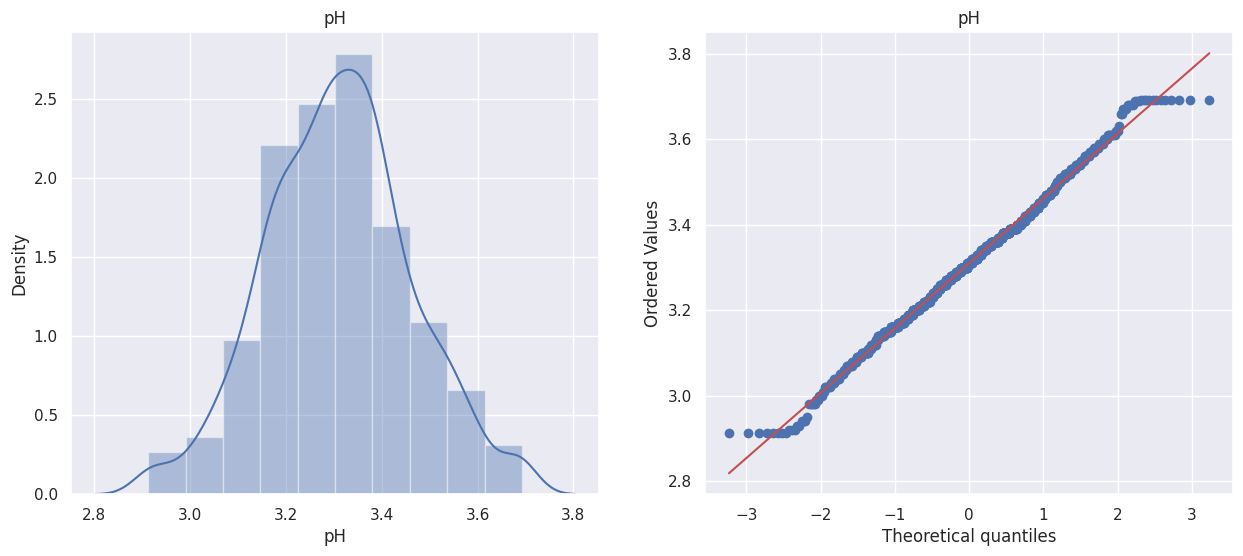

<ipython-input-356-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


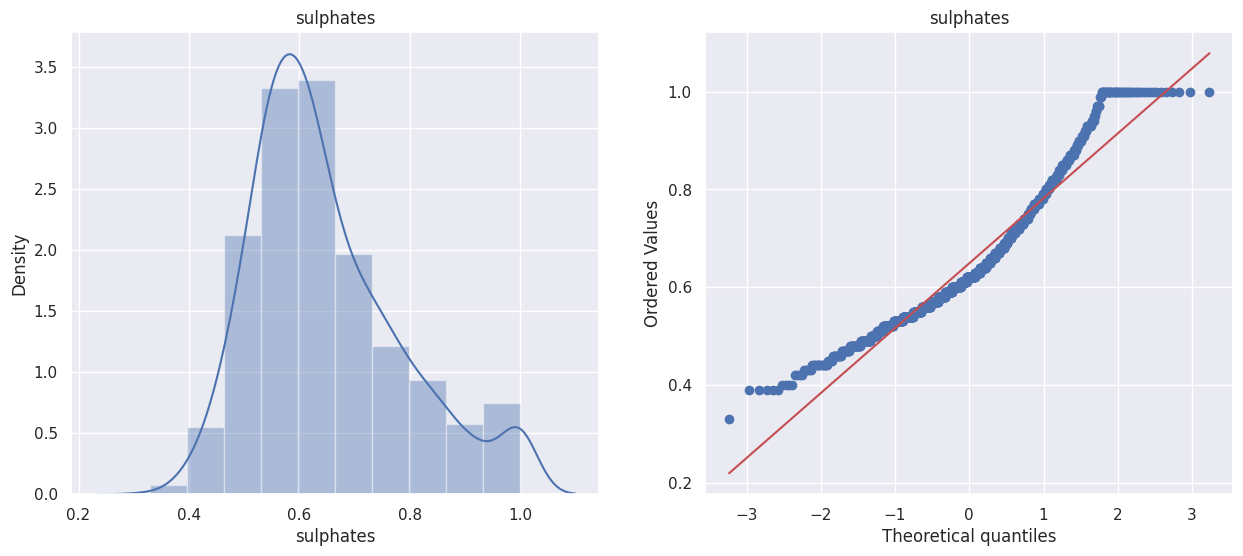

<ipython-input-356-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


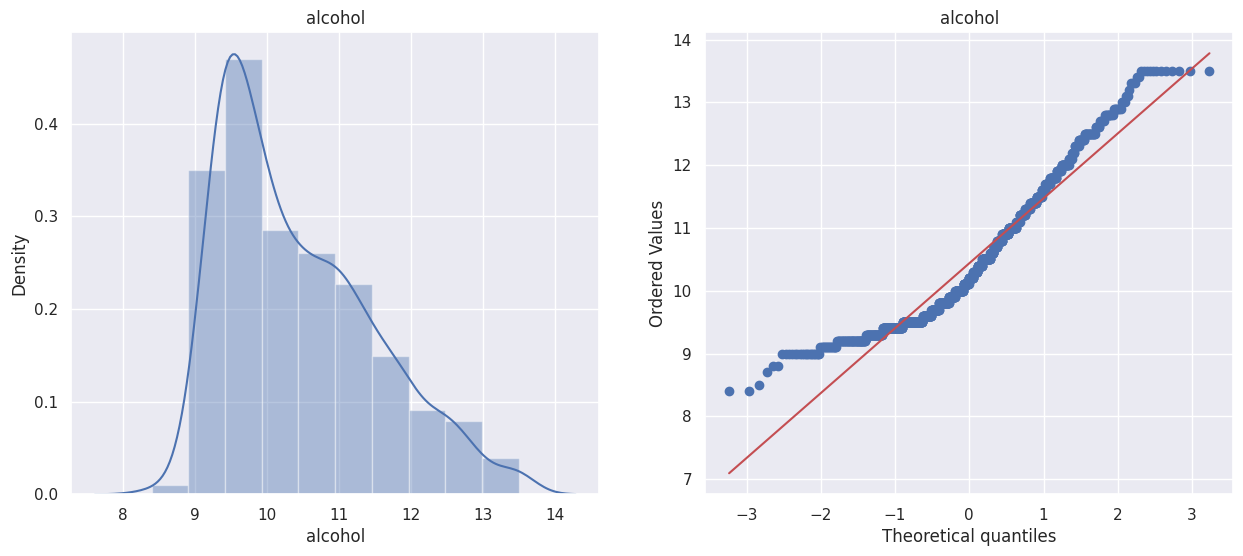

<ipython-input-356-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


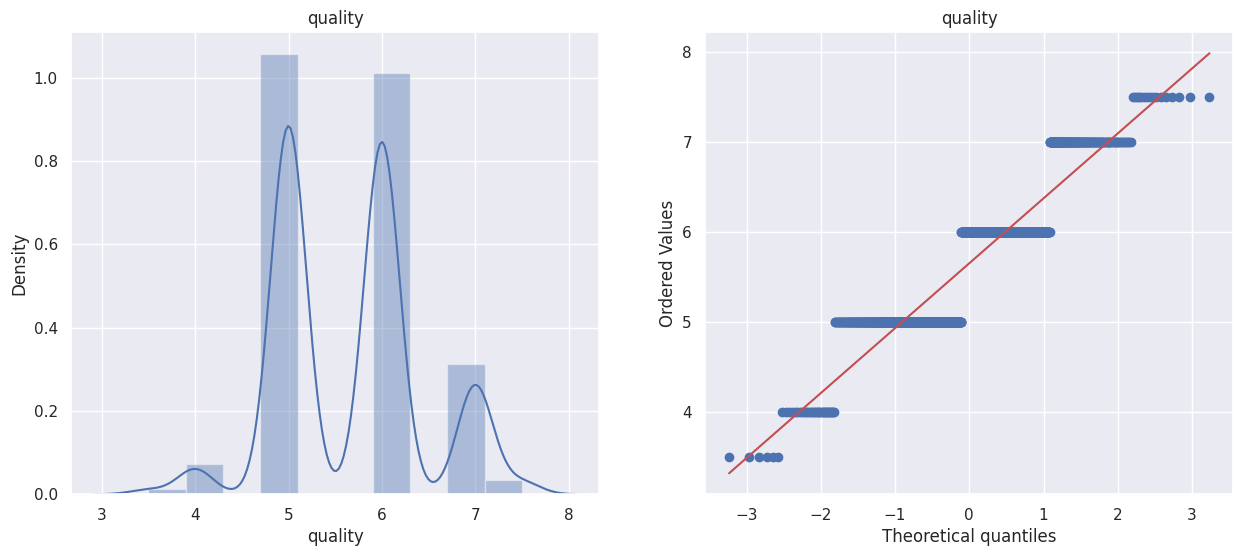

<ipython-input-356-be11a205a4e2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_cols[variable], kde=True, bins=10)


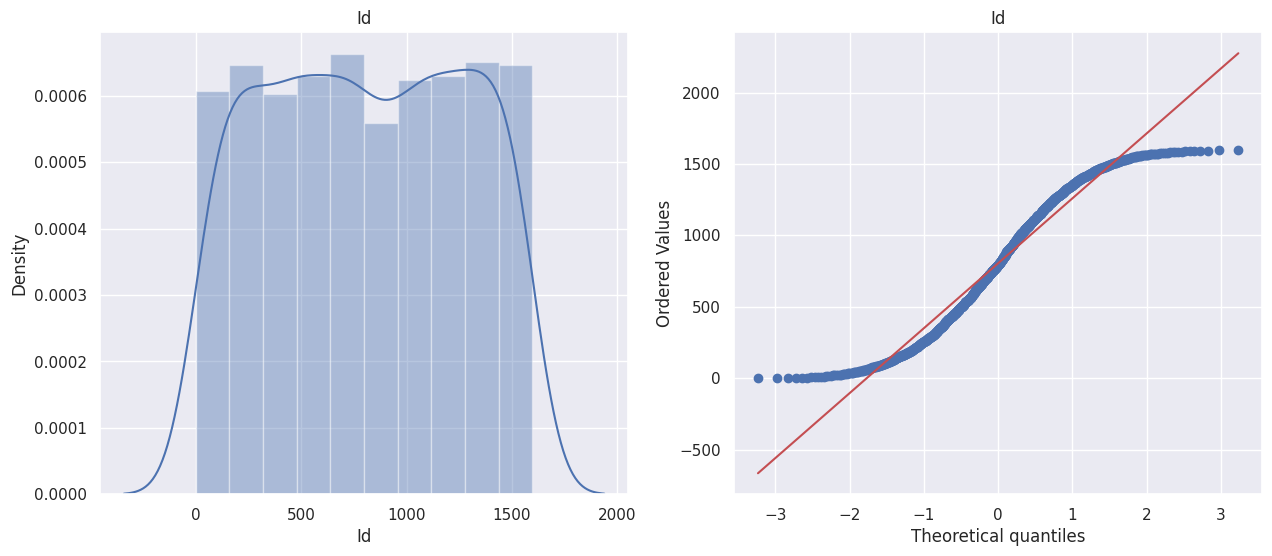

In [356]:
def plots(num_cols, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    #num_cols[variable].hist()
    sns.distplot(num_cols[variable], kde=True, bins=10)
    plt.title(variable)
    plt.subplot(1, 2, 2)
    stats.probplot(num_cols[variable], dist="norm", plot=pylab)
    plt.title(variable)
    plt.show()
for i in df.columns:
  plots(df, i)

<Axes: >

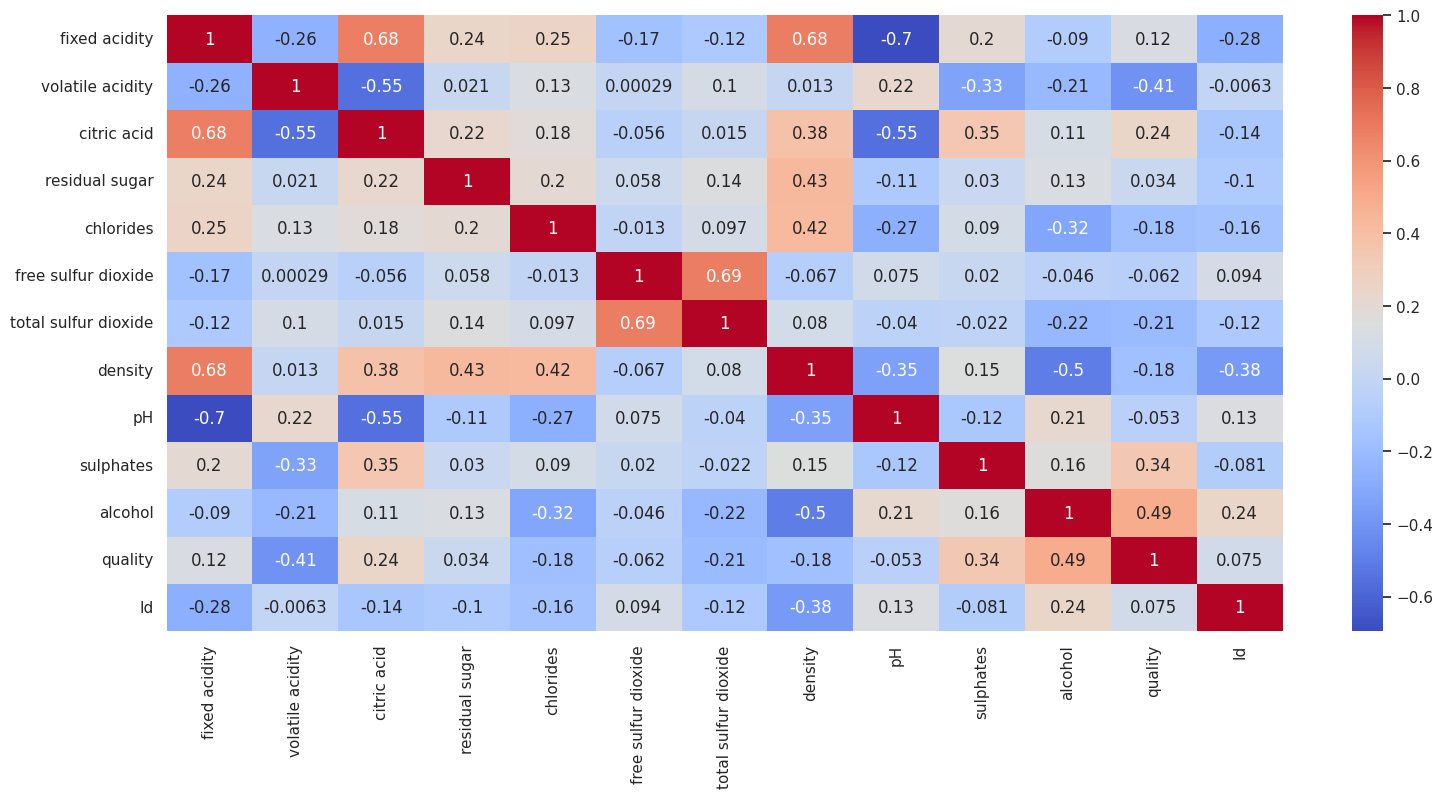

In [357]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax)

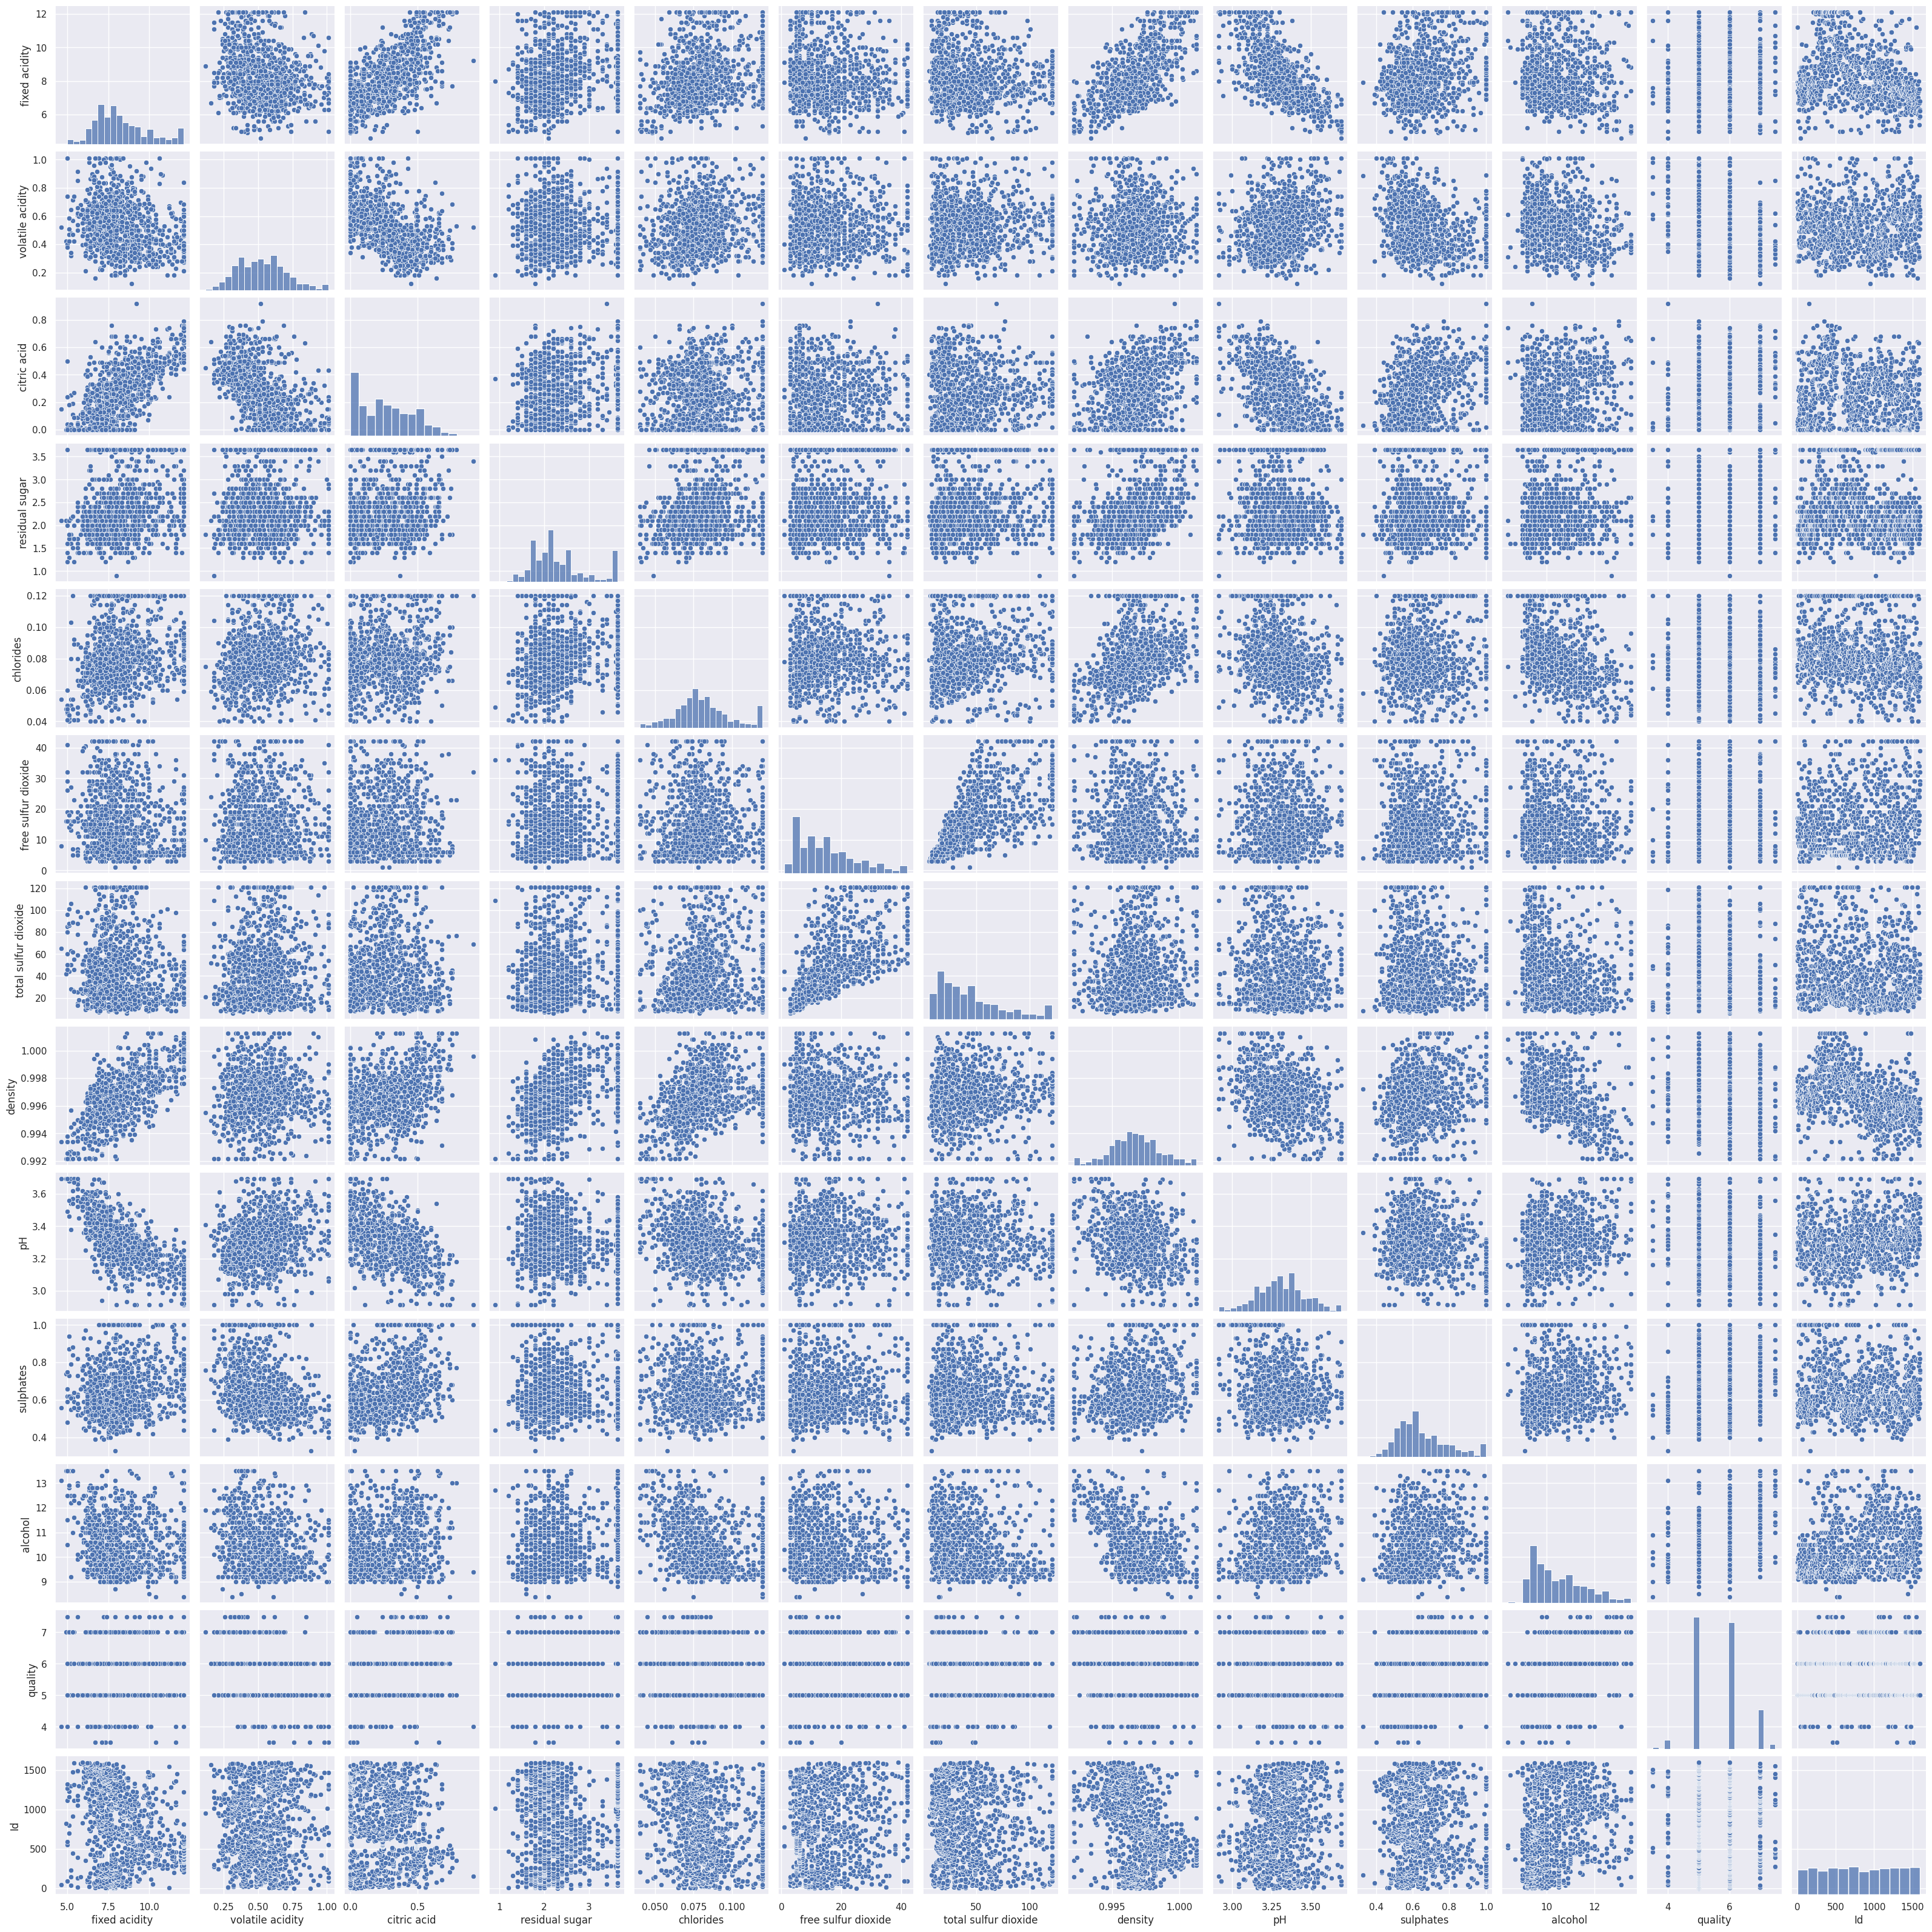

In [358]:
sns.pairplot(df)
plt.show()

# **Feature Engineering**

In [359]:
df.shape

(1143, 13)

Note:

Now, one thing which I have done is that I converted the values of quality(target variable) in binary form. As it was given that quality is good if the value is greater than 5 and it is bad if the value is below 5. I have put 1 for good and 0 for bad.

In [360]:
def map_quality(wine1):
    if wine1["quality"]>5:
        return 1
    else:
        return 0
df["quality"] = df.apply(map_quality,axis=1)

In [361]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality   Id  
0      9.4        0  0.0  
1      9.8        0  1.0  
2      9.8        0  2.0  
3      9.8        1  3.0  
4      9.4        0  4.0

In [362]:
df["quality"].value_counts()

1    621
0    522
Name: quality, dtype: int64

In [363]:
X = df.iloc[:,:11]
Y = df["quality"]

In [364]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

#### **Mutual Information**

In [365]:
mi_score = mutual_info_classif(X,Y)
mi_score = pd.Series(mi_score)
mi_score.index = X.columns
mi_score.sort_values(ascending=True)

residual sugar          0.000000
chlorides               0.010902
free sulfur dioxide     0.014279
pH                      0.017482
fixed acidity           0.017614
density                 0.019858
citric acid             0.032066
total sulfur dioxide    0.037978
sulphates               0.063207
volatile acidity        0.083396
alcohol                 0.131277
dtype: float64

<Axes: >

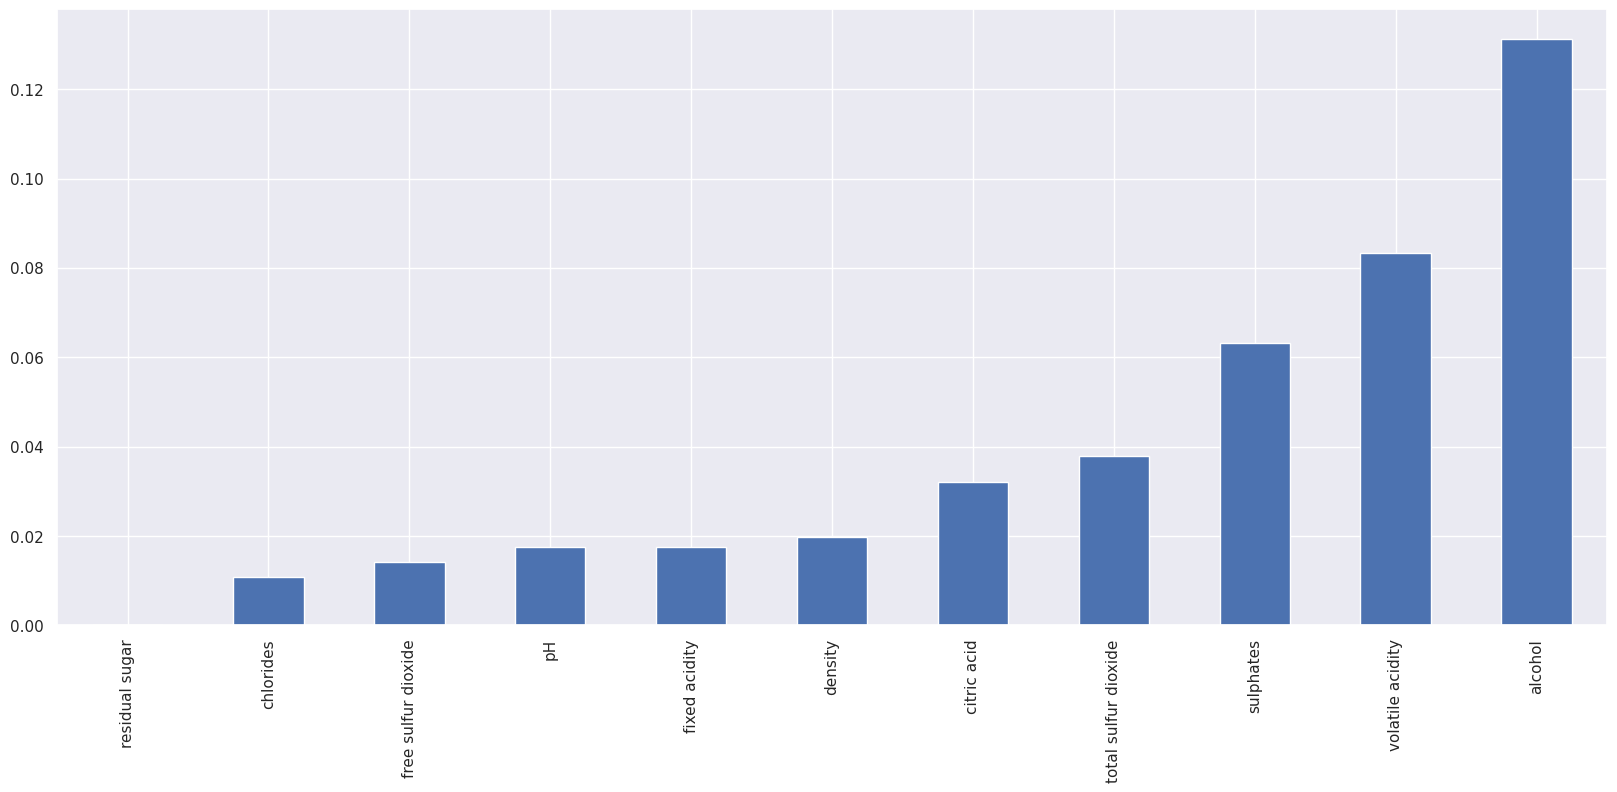

In [366]:
mi_score.sort_values(ascending=True).plot.bar(figsize=(20, 8))

#### **Create New Features**

**Alcohol Content vs. Density:**

Calculate the product of 'alcohol' and 'density'.

In [367]:
X['alcohol_density_product'] = X['alcohol'] * X['density']

**Acidity Ratio:**

 Combine 'fixed acidity' and 'volatile acidity' to create a new column representing the ratio of fixed acidity to volatile acidity.

In [368]:
X['acidity_ratio'] = X['fixed acidity'] / X['volatile acidity']

**Sugar to Acid Ratio:**

Calculate the ratio of 'residual sugar' to the sum of 'fixed acidity' and 'volatile acidity'.

In [369]:
X['sugar_to_acid_ratio'] = X['residual sugar'] / (X['fixed acidity'] + X['volatile acidity'])

**Sulfur Dioxide Ratio:**

Create a new column representing the ratio of 'free sulfur dioxide' to 'total sulfur dioxide'.

In [370]:
X['so2_ratio'] = X['free sulfur dioxide'] / X['total sulfur dioxide']

**pH and Acid Interaction:**

Multiply 'pH' with the sum of 'fixed acidity' and 'volatile acidity'.

In [371]:
X['ph_acid_interaction'] = X['pH'] * (X['fixed acidity'] + X['volatile acidity'])

**Chlorides and Sulphates Interaction:**

Multiply 'chlorides' with 'sulphates'.

In [372]:
X['chlorides_sulphates_interaction'] = X['chlorides'] * X['sulphates']

**Citric Acid vs. pH:**

Calculate the product of 'citric acid' and 'pH'.

In [373]:
X['citric_acid_ph_product'] = X['citric acid'] * X['pH']

In [374]:
mi_score = mutual_info_classif(X,Y)
mi_score = pd.Series(mi_score)
mi_score.index = X.columns
mi_score.sort_values(ascending=True)

free sulfur dioxide                0.000000
residual sugar                     0.000000
pH                                 0.001419
fixed acidity                      0.002948
chlorides                          0.010865
density                            0.045526
citric acid                        0.046546
total sulfur dioxide               0.048919
chlorides_sulphates_interaction    0.052867
sugar_to_acid_ratio                0.056351
ph_acid_interaction                0.058207
acidity_ratio                      0.064911
sulphates                          0.072992
citric_acid_ph_product             0.083424
so2_ratio                          0.083530
volatile acidity                   0.095129
alcohol                            0.125182
alcohol_density_product            0.155157
dtype: float64

<Axes: >

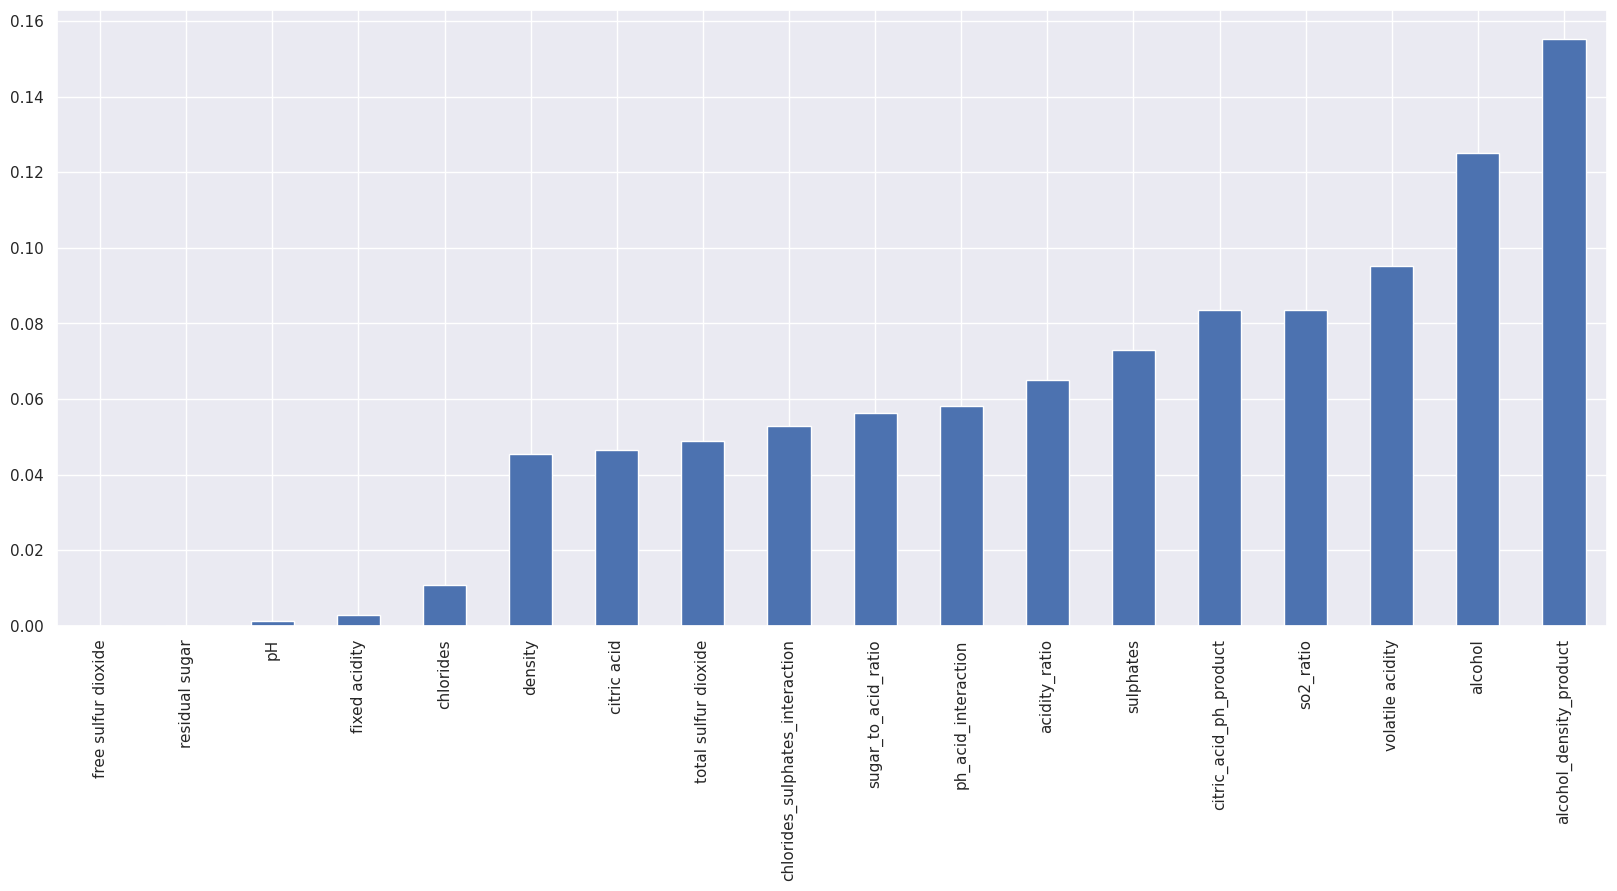

In [375]:
mi_score.sort_values(ascending=True).plot.bar(figsize=(20, 8))

#### **Spliting Data Into Train And Test**

In [376]:
train_data,test_data,train_label,test_label = train_test_split(X,Y,test_size=0.2,random_state=0)

In [377]:
print("train_data : ",train_data.shape)
print("train_label : ",train_label.shape)
print("test_data : ",test_data.shape)
print("test_label : ",test_label.shape)

train_data :  (914, 18)
train_label :  (914,)
test_data :  (229, 18)
test_label :  (229,)


#### **Normalizing Data**

In [378]:
sc = StandardScaler()
train_data_sc = sc.fit_transform(train_data)
test_data_sc = sc.fit_transform(test_data)

In [379]:
train_data_sc

array([[-1.28494968,  0.40220045, -0.93116862, ..., -1.39245295,
        -0.82386128, -0.93410952],
       [ 1.55669091, -1.21376813,  0.89967526, ...,  1.55901252,
        -0.18581501,  0.89555952],
       [ 0.40794258, -0.75206282,  0.28939396, ...,  0.57842017,
         0.86873368,  0.36057604],
       ...,
       [ 0.95208653, -0.80977598,  0.84881848, ...,  0.81885861,
        -1.24095449,  0.82357935],
       [-0.6803453 , -0.05950486, -1.18545249, ..., -0.4899958 ,
        -0.3949524 , -1.19809003],
       [ 0.34748215, -1.15605496,  0.74710493, ...,  0.28574954,
        -0.41503904,  0.79373391]])

#### **PCA**

In [380]:
pc = PCA()
train_data_sc_pc = pc.fit_transform(train_data_sc)
test_data_sc_pc = pc.fit_transform(test_data_sc)

In [381]:
explained_variance = pc.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [2.98763301e-01 1.78813878e-01 1.28917225e-01 9.75572399e-02
 7.74659784e-02 6.69030531e-02 5.16177600e-02 3.31410870e-02
 2.80138477e-02 2.36535555e-02 7.83363871e-03 3.51059515e-03
 2.32339055e-03 7.84768776e-04 5.88601528e-04 8.95889854e-05
 2.24055224e-05 8.56295607e-08]


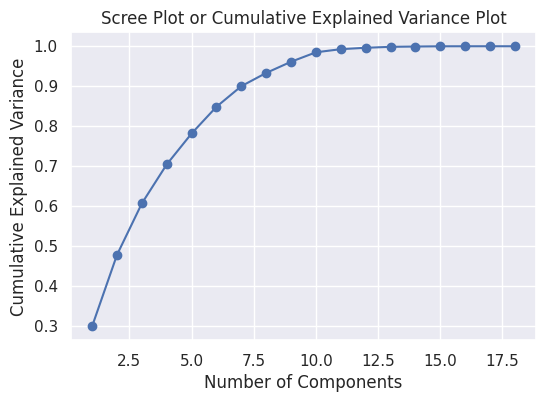

In [382]:
# calculate cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(explained_variance)

# plot the scree plot or cumulative explained variance plot
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

In [383]:
# Cumulative explained variance nikalen
cumulative_variance = np.cumsum(explained_variance)

# Kitne components select karna hai, yeh decide karen
desired_variance = 0.95  # Example: 95% variance ko capture karna hai

# Kitne components select kiye ja sakte hain
num_components = np.argmax(cumulative_variance >= desired_variance) + 1

print(f"\nNumber of components selected: {num_components}")


Number of components selected: 9


In [384]:
pc = PCA(n_components=8)
train_data_sc_pc = pc.fit_transform(train_data_sc)
test_data_sc_pc = pc.fit_transform(test_data_sc)

In [385]:
explained_variance = pc.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.2987633  0.17881388 0.12891722 0.09755724 0.07746598 0.06690305
 0.05161776 0.03314109]


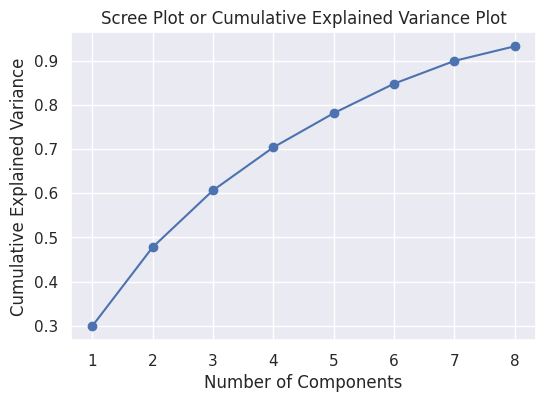

In [386]:
# calculate cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(explained_variance)

# plot the scree plot or cumulative explained variance plot
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

In [387]:
print("train_data : ",train_data_sc_pc.shape)
print("test_data : ",test_data_sc_pc.shape)

train_data :  (914, 8)
test_data :  (229, 8)


# **Model**

In [388]:
accuracy_results = {}

#### **Logistic Regression Model**

In [389]:
model_lr = LogisticRegression().fit(train_data_sc_pc,train_label)

In [390]:
y_pred = model_lr.predict(test_data_sc_pc)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0])

In [391]:
accuracy_score(y_pred,test_label)

0.7161572052401747

In [392]:
confusion_matrix(y_pred,test_label)

array([[77, 34],
       [31, 87]])

In [393]:
print(classification_report(y_pred,test_label))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       111
           1       0.72      0.74      0.73       118

    accuracy                           0.72       229
   macro avg       0.72      0.72      0.72       229
weighted avg       0.72      0.72      0.72       229



In [394]:
train_accuracy_lr = cross_val_score(model_lr,train_data_sc_pc,train_label,cv=5).mean()
test_accuracy_lr = cross_val_score(model_lr,test_data_sc_pc,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_lr)
print("Test Data Cross_val_score : ",test_accuracy_lr)

 Train Data Cross_val_score :  0.7385275926259534
Test Data Cross_val_score :  0.7422222222222222


In [395]:
accuracy_results["Logistic_Regression_Accuracy"] = train_accuracy_lr

#### **Random Forest Model**

In [396]:
model_rf = RandomForestClassifier(max_depth= 10, min_samples_leaf= 4, min_samples_split= 2, n_estimators= 200).fit(train_data_sc_pc,train_label)

In [397]:
y_pred_2 = model_rf.predict(test_data_sc_pc)

In [398]:
confusion_matrix(y_pred_2,test_label)

array([[69, 23],
       [39, 98]])

In [399]:
print(classification_report(y_pred_2,test_label))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69        92
           1       0.81      0.72      0.76       137

    accuracy                           0.73       229
   macro avg       0.72      0.73      0.72       229
weighted avg       0.74      0.73      0.73       229



In [400]:
print(" Train Data Cross_val_score : ",cross_val_score(model_rf,train_data_sc_pc,train_label,cv=5).mean())
print("Test Data Cross_val_score : ",cross_val_score(model_rf,test_data_sc_pc,test_label,cv=5).mean())

 Train Data Cross_val_score :  0.7691587101423166
Test Data Cross_val_score :  0.7731400966183575


In [401]:
train_accuracy_rf = cross_val_score(model_rf,train_data_sc_pc,train_label,cv=5).mean()
test_accuracy_rf = cross_val_score(model_rf,test_data_sc_pc,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_rf)
print("Test Data Cross_val_score : ",test_accuracy_rf)

 Train Data Cross_val_score :  0.7735423046898455
Test Data Cross_val_score :  0.7684057971014493


In [402]:
accuracy_results["Random_Forest_Accuracy"] = train_accuracy_rf

In [403]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Create Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(train_data_sc_pc, train_label)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Print the best score
print("Best Score:", grid_search.best_score_)

# Get the best model
best_rf_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.7757100822674593


#### **Decision Tree Model**

In [404]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(max_depth = 5, min_samples_leaf =  1, min_samples_split = 5).fit(train_data_sc_pc,train_label)

In [405]:
y_pred_3 = model_tree.predict(test_data_sc_pc)

In [406]:
confusion_matrix(y_pred_2,test_label)

array([[69, 23],
       [39, 98]])

In [407]:
print(classification_report(y_pred_2,test_label))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69        92
           1       0.81      0.72      0.76       137

    accuracy                           0.73       229
   macro avg       0.72      0.73      0.72       229
weighted avg       0.74      0.73      0.73       229



In [408]:
print(" Train Data Cross_val_score : ",cross_val_score(model_tree,train_data_sc_pc,train_label,cv=5).mean())
print("Test Data Cross_val_score : ",cross_val_score(model_tree,test_data_sc_pc,test_label,cv=5).mean())

 Train Data Cross_val_score :  0.726463700234192
Test Data Cross_val_score :  0.7293719806763285


In [409]:
train_accuracy_tree = cross_val_score(model_tree,train_data_sc_pc,train_label,cv=5).mean()
test_accuracy_tree = cross_val_score(model_tree,test_data_sc_pc,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_tree)
print("Test Data Cross_val_score : ",test_accuracy_tree)

 Train Data Cross_val_score :  0.726463700234192
Test Data Cross_val_score :  0.7338164251207729


In [410]:
accuracy_results["Decision_Tree_Accuracy"] = train_accuracy_tree

In [411]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Create Grid Search
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(train_data_sc_pc, train_label)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Print the best score
print("Best Score:", grid_search.best_score_)

# Get the best model
best_dt_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: 0.726463700234192


#### **KNN Model**

In [412]:
model_knn = KNeighborsClassifier().fit(train_data_sc_pc,train_label)

In [413]:
y_pred_4 = model_knn.predict(test_data_sc_pc)

In [414]:
confusion_matrix(y_pred_4,test_label)

array([[63, 29],
       [45, 92]])

In [415]:
print(classification_report(y_pred_4,test_label))

              precision    recall  f1-score   support

           0       0.58      0.68      0.63        92
           1       0.76      0.67      0.71       137

    accuracy                           0.68       229
   macro avg       0.67      0.68      0.67       229
weighted avg       0.69      0.68      0.68       229



In [416]:
print(" Train Data Cross_val_score : ",cross_val_score(model_knn,train_data_sc_pc,train_label,cv=5).mean())
print("Test Data Cross_val_score : ",cross_val_score(model_knn,test_data_sc_pc,test_label,cv=5).mean())

 Train Data Cross_val_score :  0.7155527532576713
Test Data Cross_val_score :  0.7293719806763285


In [417]:
train_accuracy_knn = cross_val_score(model_knn,train_data_sc_pc,train_label,cv=5).mean()
test_accuracy_knn = cross_val_score(model_knn,test_data_sc_pc,test_label,cv=5).mean()
print(" Train Data Cross_val_score : ",train_accuracy_knn)
print("Test Data Cross_val_score : ",test_accuracy_knn)

 Train Data Cross_val_score :  0.7155527532576713
Test Data Cross_val_score :  0.7293719806763285


In [418]:
accuracy_results["KNN_Accuracy"] = train_accuracy_rf

# **Comparison of Classification Model Accuracies**

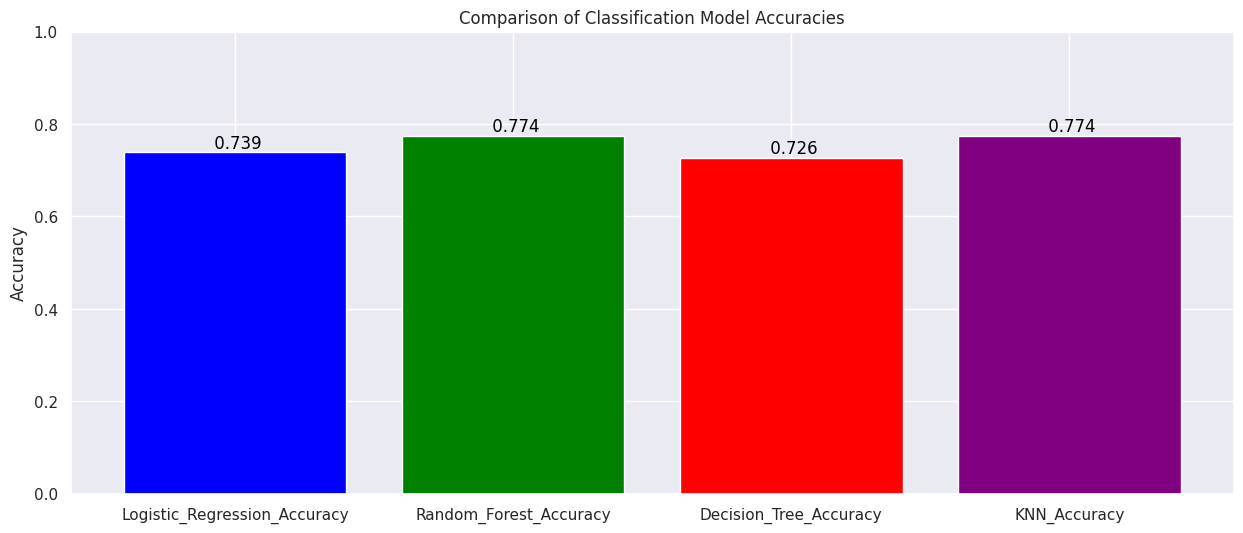

In [420]:
# Plotting the accuracy results
model_names = list(accuracy_results.keys())
accuracy_values = list(accuracy_results.values())

# Plotting the accuracy results using a different style
plt.figure(figsize=(15, 6))
plt.bar(model_names, accuracy_values, color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Model Accuracies')
plt.ylim(0, 1)
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.01, " {:.3f}".format(v), ha='center', color='black')

plt.show()